# Import necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import cv2, urllib, os, re
from PIL import Image
from tqdm import tqdm

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
#from keras.optimizers.legacy import Adam
#from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# Reading Dataset

In [26]:
df = pd.read_csv("/content/drive/MyDrive/Riyan Assignment/main_dataset.csv", nrows=5000)
df

,image,name,author,format,book_depository_stars,price,currency,old_price,isbn,category,img_paths
0,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,This is Going to Hurt,Adam Kay,Paperback,4.5,7.6,$,11.4,9781509858637,Medical,dataset/Medical/0000001.jpg
1,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,"Thinking, Fast and Slow",Daniel Kahneman,Paperback,4.0,11.5,$,15.0,9780141033570,Medical,dataset/Medical/0000002.jpg
2,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,When Breath Becomes Air,Paul Kalanithi,Paperback,4.5,9.05,$,11.5,9781784701994,Medical,dataset/Medical/0000003.jpg
3,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,The Happiness Trap,Russ Harris,Paperback,4.0,8.34,$,13.9,9781845298258,Medical,dataset/Medical/0000004.jpg
4,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Man's Search For Meaning,Viktor E. Frankl,Paperback,4.5,9.66,$,NaN,9781846041242,Medical,dataset/Medical/0000005.jpg
...,...,...,...,...,...,...,...,...,...,...,...
4995,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Aristotle and Dante Discover the Secrets of th...,Benjamin Alire Saenz,Paperback,4.5,7.72,$,15.0,9781442408937,Childrens-Books,dataset/Childrens-Books/0000059.jpg
4996,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,I'm a Big Sister,Joanna Cole,Hardback,4.0,6.12,$,7.8,9780061900624,Childrens-Books,dataset/Childrens-Books/0000060.jpg
4997,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,On the Night You Were Born,Nancy Tillman,Board book,4.5,6.86,$,8.8,9780312601553,Childrens-Books,dataset/Childrens-Books/0000061.jpg
4998,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Look Inside Things That Go,Rob Lloyd Jones,Hardback,4.5,9.92,$,12.9,9781409550259,Childrens-Books,dataset/Childrens-Books/0000062.jpg


In [27]:
df.shape

(5000, 11)

In [28]:
df.isna().sum()

image                      0
name                       0
author                    24
format                     3
book_depository_stars      0
price                      0
currency                   0
old_price                711
isbn                       0
category                   0
img_paths                  0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image                  5000 non-null   object 
 1   name                   5000 non-null   object 
 2   author                 4976 non-null   object 
 3   format                 4997 non-null   object 
 4   book_depository_stars  5000 non-null   float64
 5   price                  5000 non-null   object 
 6   currency               5000 non-null   object 
 7   old_price              4289 non-null   float64
 8   isbn                   5000 non-null   int64  
 9   category               5000 non-null   object 
 10  img_paths              5000 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 429.8+ KB


# Cleaning price column

In [30]:
df['price'] = df.price.apply(lambda x :re.sub("[^0-9.]",'',x)).apply(float)
df

,image,name,author,format,book_depository_stars,price,currency,old_price,isbn,category,img_paths
0,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,This is Going to Hurt,Adam Kay,Paperback,4.5,7.60,$,11.4,9781509858637,Medical,dataset/Medical/0000001.jpg
1,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,"Thinking, Fast and Slow",Daniel Kahneman,Paperback,4.0,11.50,$,15.0,9780141033570,Medical,dataset/Medical/0000002.jpg
2,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,When Breath Becomes Air,Paul Kalanithi,Paperback,4.5,9.05,$,11.5,9781784701994,Medical,dataset/Medical/0000003.jpg
3,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,The Happiness Trap,Russ Harris,Paperback,4.0,8.34,$,13.9,9781845298258,Medical,dataset/Medical/0000004.jpg
4,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Man's Search For Meaning,Viktor E. Frankl,Paperback,4.5,9.66,$,NaN,9781846041242,Medical,dataset/Medical/0000005.jpg
...,...,...,...,...,...,...,...,...,...,...,...
4995,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Aristotle and Dante Discover the Secrets of th...,Benjamin Alire Saenz,Paperback,4.5,7.72,$,15.0,9781442408937,Childrens-Books,dataset/Childrens-Books/0000059.jpg
4996,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,I'm a Big Sister,Joanna Cole,Hardback,4.0,6.12,$,7.8,9780061900624,Childrens-Books,dataset/Childrens-Books/0000060.jpg
4997,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,On the Night You Were Born,Nancy Tillman,Board book,4.5,6.86,$,8.8,9780312601553,Childrens-Books,dataset/Childrens-Books/0000061.jpg
4998,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Look Inside Things That Go,Rob Lloyd Jones,Hardback,4.5,9.92,$,12.9,9781409550259,Childrens-Books,dataset/Childrens-Books/0000062.jpg


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image                  5000 non-null   object 
 1   name                   5000 non-null   object 
 2   author                 4976 non-null   object 
 3   format                 4997 non-null   object 
 4   book_depository_stars  5000 non-null   float64
 5   price                  5000 non-null   float64
 6   currency               5000 non-null   object 
 7   old_price              4289 non-null   float64
 8   isbn                   5000 non-null   int64  
 9   category               5000 non-null   object 
 10  img_paths              5000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 429.8+ KB


# Visualize an image

/content/drive/MyDrive/Riyan Assignment/dataset/Medical/0000001.jpg


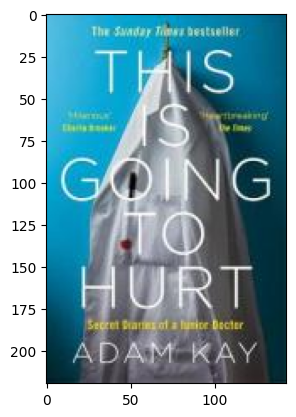

In [32]:
def show_image_from_url(image_url):
    print(image_url)
    img = Image.open(image_url)
    img_arr = np.array(img)
    plt.imshow(img_arr)
    plt.show()


path = "/content/drive/MyDrive/Riyan Assignment/dataset/Medical/0000001.jpg"
show_image_from_url(path)


# Image Processing

In [33]:
def image_processing(img_path):
    image = cv2.imread(img_path)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = cv2.inRange(image_hsv, (0,255,255), (0,255,255))


    if len(np.where(mask != 0)[0]) != 0:
        y1 = min(np.where(mask != 0)[0])
        y2 = max(np.where(mask != 0)[0])
    else:
        y1 = 0
        y2 = len(mask)
    if len(np.where(mask != 0)[1]) != 0:
        x1 = min(np.where(mask != 0)[1])
        x2 = max(np.where(mask != 0)[1])
    else:
        x1 = 0
        x2 = len(mask[0])

    image_cropped = image_gray[y1:y2, x1:x2]
    if image_cropped.size ==0:
        return image_cropped
    else:
        image_100x100 = cv2.resize(image_cropped, (100, 100))
        image_arr = image_100x100.flatten()

    return image_arr


    plt.imshow(image_gray)
    plt.show()


image_list = []
img_path_list = df['img_paths'].to_list()

for img_path in tqdm(img_path_list):
    full_path = "/content/drive/MyDrive/Riyan Assignment/" + img_path
    # calling function
    image_list.append(image_processing(full_path))

print("Total number of images are :", len(image_list))

100%|██████████| 5000/5000 [24:05<00:00,  3.46it/s]

Total number of images are : 5000


In [34]:
img_1 = image_list[0]
img_1.shape

(10000,)

# Saving images with pickle

In [35]:
X = np.array(image_list, dtype="object")
np.save('/content/drive/MyDrive/Riyan Assignment/processed_100x100_image.npy', X/255,allow_pickle=True)
book_array = np.load('/content/drive/MyDrive/Riyan Assignment/processed_100x100_image.npy', allow_pickle=True)

# Drop image of different dimension

In [36]:
X =[]
exclude =[]
for i in range(len(book_array)):
    if book_array[i].shape == (10000,):
        X.append(book_array[i])
    else:
        exclude.append(i)
X =np.array(X)
#also remove from the dataframe
df.drop(df.index[exclude],inplace=True)
print("Length of X is: ", len(X))

Length of X is:  4995


# Processed Image

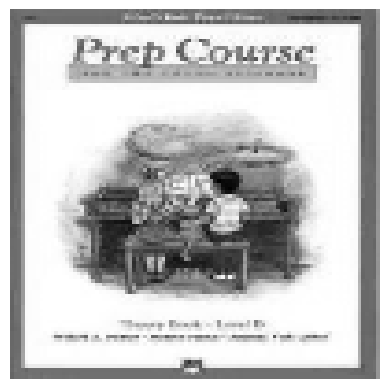

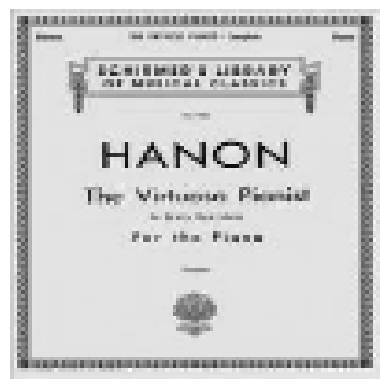

In [37]:
np.random.seed(17)
for i in np.random.randint(0, len(book_array), 2):
    plt.figure()
    plt.imshow(book_array[i].reshape(100, 100), cmap='gray'), plt.axis('off')

# Define Deep Learning(Convolutional) Network/Model

In [38]:
input_shape = (100, 100, 1)
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
#model.add(Dense(n_classes, activation='softmax'))
model.add(Dense(1, activation='relu'))
learning_rate = 0.001
model.compile(loss = 'mse',
              optimizer = Adam(learning_rate))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 16)        160       
                                                                 
 batch_normalization_4 (Bat  (None, 98, 98, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 16)        2320      
                                                                 
 batch_normalization_5 (Bat  (None, 96, 96, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 48, 48, 16)        0         
 g2D)                                                            
                                                      

# Dividing Dataset and Declare some variable

In [39]:
save_at = "/content/drive/MyDrive/Riyan Assignment/models/models/model_regression.hdf5"
save_best2 = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')

In [40]:
Y = np.array(df.price.tolist())
X_test = X[4950:,]
Y_test = Y[4950:,]
X_train, X_val, Y_train, Y_val = train_test_split(X[:4950,], Y[:4950,], test_size=0.15, random_state=13)

# reshaping features
img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

# Model Training

In [41]:
history = model.fit( X_train, Y_train,
                    epochs = 500, batch_size = 100,
                    callbacks=[save_best2], verbose=1,
                   validation_data = (X_val, Y_val))

Epoch 1/500
43/43 [==============================] - ETA: 0s - loss: 301.1452

43/43 [==============================] - 6s 78ms/step - loss: 301.1452 - val_loss: 405.8548
Epoch 2/500
42/43 [============================>.] - ETA: 0s - loss: 212.3779

43/43 [==============================] - 3s 64ms/step - loss: 212.9133 - val_loss: 340.8041
Epoch 3/500
42/43 [============================>.] - ETA: 0s - loss: 205.7960

43/43 [==============================] - 3s 59ms/step - loss: 205.6752 - val_loss: 264.7144
Epoch 4/500
42/43 [============================>.] - ETA: 0s - loss: 185.5375

43/43 [==============================] - 2s 58ms/step - loss: 185.2752 - val_loss: 216.7559
Epoch 5/500
42/43 [============================>.] - ETA: 0s - loss: 148.0831

43/43 [==============================] - 2s 58ms/step - loss: 151.4360 - val_loss: 231.0801
Epoch 6/500
42/43 [============================>.] - ETA: 0s - loss: 147.9453

43/43 [==============================] - 3s 59ms/step - loss: 148.0190 - val_loss: 206.3031
Epoch 7/500
42/43 [============================>.] - ETA: 0s - loss: 105.3949

43/43 [==============================] - 3s 63ms/step - loss: 105.5181 - val_loss: 201.4677
Epoch 8/500
42/43 [============================>.] - ETA: 0s - loss: 110.9070

43/43 [==============================] - 3s 61ms/step - loss: 110.7548 - val_loss: 229.0300
Epoch 9/500
42/43 [============================>.] - ETA: 0s - loss: 89.8231

43/43 [==============================] - 3s 60ms/step - loss: 89.7261 - val_loss: 229.9440
Epoch 10/500
42/43 [============================>.] - ETA: 0s - loss: 72.2800

43/43 [==============================] - 3s 58ms/step - loss: 72.1702 - val_loss: 204.3421
Epoch 11/500
42/43 [============================>.] - ETA: 0s - loss: 63.2716

43/43 [==============================] - 3s 59ms/step - loss: 63.3248 - val_loss: 214.9170
Epoch 12/500
42/43 [============================>.] - ETA: 0s - loss: 58.3335

43/43 [==============================] - 3s 59ms/step - loss: 58.2718 - val_loss: 217.9282
Epoch 13/500
42/43 [============================>.] - ETA: 0s - loss: 50.0964

43/43 [==============================] - 3s 62ms/step - loss: 50.0668 - val_loss: 200.8847
Epoch 14/500
42/43 [============================>.] - ETA: 0s - loss: 46.7492

43/43 [==============================] - 3s 63ms/step - loss: 46.7002 - val_loss: 195.6358
Epoch 15/500
42/43 [============================>.] - ETA: 0s - loss: 49.0512

43/43 [==============================] - 3s 61ms/step - loss: 49.0032 - val_loss: 197.0056
Epoch 16/500
42/43 [============================>.] - ETA: 0s - loss: 43.6453

43/43 [==============================] - 3s 58ms/step - loss: 43.6242 - val_loss: 193.2251
Epoch 17/500
42/43 [============================>.] - ETA: 0s - loss: 44.5142

43/43 [==============================] - 3s 58ms/step - loss: 44.4714 - val_loss: 199.3237
Epoch 18/500
42/43 [============================>.] - ETA: 0s - loss: 39.9509

43/43 [==============================] - 3s 60ms/step - loss: 39.9056 - val_loss: 183.5962
Epoch 19/500
42/43 [============================>.] - ETA: 0s - loss: 40.7016

43/43 [==============================] - 3s 63ms/step - loss: 40.7100 - val_loss: 181.0299
Epoch 20/500
42/43 [============================>.] - ETA: 0s - loss: 38.6946

43/43 [==============================] - 3s 63ms/step - loss: 38.6577 - val_loss: 184.2064
Epoch 21/500
42/43 [============================>.] - ETA: 0s - loss: 37.7615

43/43 [==============================] - 3s 60ms/step - loss: 37.8767 - val_loss: 179.8869
Epoch 22/500
42/43 [============================>.] - ETA: 0s - loss: 43.4773

43/43 [==============================] - 3s 59ms/step - loss: 43.4234 - val_loss: 193.0827
Epoch 23/500
42/43 [============================>.] - ETA: 0s - loss: 48.1659

43/43 [==============================] - 3s 58ms/step - loss: 48.0980 - val_loss: 179.9517
Epoch 24/500
42/43 [============================>.] - ETA: 0s - loss: 40.5796

43/43 [==============================] - 2s 58ms/step - loss: 40.5722 - val_loss: 196.8672
Epoch 25/500
42/43 [============================>.] - ETA: 0s - loss: 36.3036

43/43 [==============================] - 3s 62ms/step - loss: 36.3157 - val_loss: 180.2543
Epoch 26/500
42/43 [============================>.] - ETA: 0s - loss: 37.5757

43/43 [==============================] - 3s 68ms/step - loss: 37.5215 - val_loss: 183.2399
Epoch 27/500
42/43 [============================>.] - ETA: 0s - loss: 31.9281

43/43 [==============================] - 3s 70ms/step - loss: 31.8921 - val_loss: 182.7659
Epoch 28/500
42/43 [============================>.] - ETA: 0s - loss: 31.7289

43/43 [==============================] - 3s 61ms/step - loss: 31.8325 - val_loss: 183.5735
Epoch 29/500
42/43 [============================>.] - ETA: 0s - loss: 40.8265

43/43 [==============================] - 3s 59ms/step - loss: 40.7787 - val_loss: 179.9402
Epoch 30/500
42/43 [============================>.] - ETA: 0s - loss: 30.8843

43/43 [==============================] - 3s 59ms/step - loss: 31.0350 - val_loss: 183.7725
Epoch 31/500
42/43 [============================>.] - ETA: 0s - loss: 61.2953

43/43 [==============================] - 3s 62ms/step - loss: 61.2370 - val_loss: 208.3444
Epoch 32/500
42/43 [============================>.] - ETA: 0s - loss: 37.3989

43/43 [==============================] - 3s 62ms/step - loss: 37.4933 - val_loss: 169.8725
Epoch 33/500
42/43 [============================>.] - ETA: 0s - loss: 40.7128

43/43 [==============================] - 3s 63ms/step - loss: 40.6666 - val_loss: 190.6690
Epoch 34/500
42/43 [============================>.] - ETA: 0s - loss: 36.5052

43/43 [==============================] - 3s 61ms/step - loss: 36.4661 - val_loss: 188.9519
Epoch 35/500
42/43 [============================>.] - ETA: 0s - loss: 33.7461

43/43 [==============================] - 3s 61ms/step - loss: 33.7124 - val_loss: 183.7775
Epoch 36/500
42/43 [============================>.] - ETA: 0s - loss: 29.1986

43/43 [==============================] - 3s 59ms/step - loss: 29.1694 - val_loss: 187.6284
Epoch 37/500
42/43 [============================>.] - ETA: 0s - loss: 28.0610

43/43 [==============================] - 3s 61ms/step - loss: 28.0380 - val_loss: 189.3757
Epoch 38/500
42/43 [============================>.] - ETA: 0s - loss: 27.0809

43/43 [==============================] - 3s 63ms/step - loss: 27.0446 - val_loss: 174.6563
Epoch 39/500
42/43 [============================>.] - ETA: 0s - loss: 25.9019

43/43 [==============================] - 3s 62ms/step - loss: 26.1241 - val_loss: 199.6948
Epoch 40/500
42/43 [============================>.] - ETA: 0s - loss: 30.4019

43/43 [==============================] - 3s 61ms/step - loss: 30.3721 - val_loss: 201.2617
Epoch 41/500
42/43 [============================>.] - ETA: 0s - loss: 31.1960

43/43 [==============================] - 3s 59ms/step - loss: 31.5827 - val_loss: 190.9823
Epoch 42/500
42/43 [============================>.] - ETA: 0s - loss: 39.2320

43/43 [==============================] - 3s 59ms/step - loss: 39.1998 - val_loss: 179.8204
Epoch 43/500
42/43 [============================>.] - ETA: 0s - loss: 32.8484

43/43 [==============================] - 3s 59ms/step - loss: 32.8177 - val_loss: 178.9183
Epoch 44/500
42/43 [============================>.] - ETA: 0s - loss: 29.6325

43/43 [==============================] - 3s 63ms/step - loss: 29.6253 - val_loss: 180.0396
Epoch 45/500
42/43 [============================>.] - ETA: 0s - loss: 44.8250

43/43 [==============================] - 3s 64ms/step - loss: 44.8176 - val_loss: 173.5265
Epoch 46/500
42/43 [============================>.] - ETA: 0s - loss: 30.0497

43/43 [==============================] - 3s 61ms/step - loss: 30.0334 - val_loss: 191.3956
Epoch 47/500
42/43 [============================>.] - ETA: 0s - loss: 26.2633

43/43 [==============================] - 3s 59ms/step - loss: 26.2832 - val_loss: 187.0917
Epoch 48/500
42/43 [============================>.] - ETA: 0s - loss: 27.6365

43/43 [==============================] - 3s 59ms/step - loss: 27.5985 - val_loss: 190.7062
Epoch 49/500
42/43 [============================>.] - ETA: 0s - loss: 29.5972

43/43 [==============================] - 3s 61ms/step - loss: 29.5798 - val_loss: 174.8736
Epoch 50/500
42/43 [============================>.] - ETA: 0s - loss: 27.7869

43/43 [==============================] - 3s 61ms/step - loss: 27.7719 - val_loss: 176.1583
Epoch 51/500
42/43 [============================>.] - ETA: 0s - loss: 20.6748

43/43 [==============================] - 3s 64ms/step - loss: 20.6582 - val_loss: 179.1777
Epoch 52/500
42/43 [============================>.] - ETA: 0s - loss: 25.0056

43/43 [==============================] - 3s 61ms/step - loss: 25.0029 - val_loss: 177.4113
Epoch 53/500
42/43 [============================>.] - ETA: 0s - loss: 29.4371

43/43 [==============================] - 3s 61ms/step - loss: 29.4531 - val_loss: 171.3186
Epoch 54/500
42/43 [============================>.] - ETA: 0s - loss: 25.1878

43/43 [==============================] - 3s 61ms/step - loss: 25.2610 - val_loss: 199.1574
Epoch 55/500
42/43 [============================>.] - ETA: 0s - loss: 30.9403

43/43 [==============================] - 3s 59ms/step - loss: 30.9048 - val_loss: 168.0784
Epoch 56/500
42/43 [============================>.] - ETA: 0s - loss: 23.9421

43/43 [==============================] - 3s 63ms/step - loss: 23.9188 - val_loss: 182.3228
Epoch 57/500
42/43 [============================>.] - ETA: 0s - loss: 24.5301

43/43 [==============================] - 3s 61ms/step - loss: 24.5548 - val_loss: 180.8192
Epoch 58/500
42/43 [============================>.] - ETA: 0s - loss: 26.0111

43/43 [==============================] - 3s 61ms/step - loss: 26.0131 - val_loss: 179.8967
Epoch 59/500
42/43 [============================>.] - ETA: 0s - loss: 23.0535

43/43 [==============================] - 3s 59ms/step - loss: 23.0438 - val_loss: 188.5986
Epoch 60/500
42/43 [============================>.] - ETA: 0s - loss: 24.9268

43/43 [==============================] - 3s 61ms/step - loss: 24.8952 - val_loss: 186.4329
Epoch 61/500
42/43 [============================>.] - ETA: 0s - loss: 21.8199

43/43 [==============================] - 3s 60ms/step - loss: 21.7971 - val_loss: 173.2072
Epoch 62/500
42/43 [============================>.] - ETA: 0s - loss: 23.4767

43/43 [==============================] - 3s 62ms/step - loss: 23.4697 - val_loss: 180.8786
Epoch 63/500
42/43 [============================>.] - ETA: 0s - loss: 25.3947

43/43 [==============================] - 3s 64ms/step - loss: 25.3658 - val_loss: 169.3609
Epoch 64/500
42/43 [============================>.] - ETA: 0s - loss: 22.8550

43/43 [==============================] - 3s 64ms/step - loss: 22.8484 - val_loss: 175.5200
Epoch 65/500
42/43 [============================>.] - ETA: 0s - loss: 24.4998

43/43 [==============================] - 3s 60ms/step - loss: 24.5284 - val_loss: 173.4366
Epoch 66/500
42/43 [============================>.] - ETA: 0s - loss: 24.1337

43/43 [==============================] - 3s 60ms/step - loss: 24.1165 - val_loss: 182.6125
Epoch 67/500
42/43 [============================>.] - ETA: 0s - loss: 21.0678

43/43 [==============================] - 3s 60ms/step - loss: 21.0351 - val_loss: 183.7134
Epoch 68/500
42/43 [============================>.] - ETA: 0s - loss: 23.3545

43/43 [==============================] - 3s 60ms/step - loss: 23.3415 - val_loss: 172.3067
Epoch 69/500
42/43 [============================>.] - ETA: 0s - loss: 24.5680

43/43 [==============================] - 3s 64ms/step - loss: 24.5393 - val_loss: 179.4346
Epoch 70/500
42/43 [============================>.] - ETA: 0s - loss: 20.9013

43/43 [==============================] - 3s 61ms/step - loss: 20.8760 - val_loss: 184.3311
Epoch 71/500
42/43 [============================>.] - ETA: 0s - loss: 19.9638

43/43 [==============================] - 3s 61ms/step - loss: 19.9544 - val_loss: 178.5716
Epoch 72/500
42/43 [============================>.] - ETA: 0s - loss: 21.5320

43/43 [==============================] - 3s 62ms/step - loss: 21.5146 - val_loss: 174.1604
Epoch 73/500
42/43 [============================>.] - ETA: 0s - loss: 22.6441

43/43 [==============================] - 3s 61ms/step - loss: 22.6208 - val_loss: 181.0312
Epoch 74/500
42/43 [============================>.] - ETA: 0s - loss: 19.6231

43/43 [==============================] - 3s 61ms/step - loss: 19.6083 - val_loss: 183.1785
Epoch 75/500
42/43 [============================>.] - ETA: 0s - loss: 22.2867

43/43 [==============================] - 3s 63ms/step - loss: 22.2665 - val_loss: 182.3647
Epoch 76/500
42/43 [============================>.] - ETA: 0s - loss: 22.7565

43/43 [==============================] - 3s 65ms/step - loss: 22.7374 - val_loss: 182.6993
Epoch 77/500
42/43 [============================>.] - ETA: 0s - loss: 20.8913

43/43 [==============================] - 3s 63ms/step - loss: 20.8667 - val_loss: 170.7814
Epoch 78/500
42/43 [============================>.] - ETA: 0s - loss: 21.3578

43/43 [==============================] - 3s 62ms/step - loss: 21.3334 - val_loss: 175.8819
Epoch 79/500
42/43 [============================>.] - ETA: 0s - loss: 19.2770

43/43 [==============================] - 3s 60ms/step - loss: 19.2828 - val_loss: 185.5106
Epoch 80/500
42/43 [============================>.] - ETA: 0s - loss: 19.3577

43/43 [==============================] - 3s 60ms/step - loss: 19.3272 - val_loss: 178.9413
Epoch 81/500
42/43 [============================>.] - ETA: 0s - loss: 23.9856

43/43 [==============================] - 3s 62ms/step - loss: 23.9676 - val_loss: 180.2133
Epoch 82/500
42/43 [============================>.] - ETA: 0s - loss: 20.2329

43/43 [==============================] - 3s 62ms/step - loss: 20.2148 - val_loss: 179.9019
Epoch 83/500
42/43 [============================>.] - ETA: 0s - loss: 21.7487

43/43 [==============================] - 3s 61ms/step - loss: 21.7718 - val_loss: 181.1754
Epoch 84/500
42/43 [============================>.] - ETA: 0s - loss: 22.3830

43/43 [==============================] - 3s 60ms/step - loss: 22.3544 - val_loss: 172.5184
Epoch 85/500
42/43 [============================>.] - ETA: 0s - loss: 20.3208

43/43 [==============================] - 3s 62ms/step - loss: 20.4999 - val_loss: 188.5245
Epoch 86/500
42/43 [============================>.] - ETA: 0s - loss: 26.6811

43/43 [==============================] - 3s 60ms/step - loss: 26.6503 - val_loss: 184.1588
Epoch 87/500
42/43 [============================>.] - ETA: 0s - loss: 25.4894

43/43 [==============================] - 3s 63ms/step - loss: 25.4767 - val_loss: 176.8867
Epoch 88/500
42/43 [============================>.] - ETA: 0s - loss: 22.1203

43/43 [==============================] - 3s 64ms/step - loss: 22.2867 - val_loss: 173.1492
Epoch 89/500
42/43 [============================>.] - ETA: 0s - loss: 41.0364

43/43 [==============================] - 3s 61ms/step - loss: 41.0812 - val_loss: 177.8469
Epoch 90/500
42/43 [============================>.] - ETA: 0s - loss: 31.2590

43/43 [==============================] - 3s 62ms/step - loss: 31.2246 - val_loss: 166.7343
Epoch 91/500
42/43 [============================>.] - ETA: 0s - loss: 30.1335

43/43 [==============================] - 3s 60ms/step - loss: 30.0902 - val_loss: 184.4557
Epoch 92/500
42/43 [============================>.] - ETA: 0s - loss: 26.6839

43/43 [==============================] - 3s 61ms/step - loss: 26.6513 - val_loss: 182.5840
Epoch 93/500
42/43 [============================>.] - ETA: 0s - loss: 22.3129

43/43 [==============================] - 3s 61ms/step - loss: 22.3044 - val_loss: 180.7732
Epoch 94/500
42/43 [============================>.] - ETA: 0s - loss: 22.5867

43/43 [==============================] - 3s 65ms/step - loss: 22.5858 - val_loss: 180.3579
Epoch 95/500
42/43 [============================>.] - ETA: 0s - loss: 22.7948

43/43 [==============================] - 3s 62ms/step - loss: 22.7772 - val_loss: 178.1794
Epoch 96/500
42/43 [============================>.] - ETA: 0s - loss: 19.4075

43/43 [==============================] - 3s 59ms/step - loss: 19.3990 - val_loss: 180.2775
Epoch 97/500
42/43 [============================>.] - ETA: 0s - loss: 23.0485

43/43 [==============================] - 3s 60ms/step - loss: 23.0135 - val_loss: 191.1575
Epoch 98/500
42/43 [============================>.] - ETA: 0s - loss: 22.1827

43/43 [==============================] - 3s 62ms/step - loss: 22.1628 - val_loss: 173.1372
Epoch 99/500
42/43 [============================>.] - ETA: 0s - loss: 20.8244

43/43 [==============================] - 3s 62ms/step - loss: 20.7990 - val_loss: 180.7361
Epoch 100/500
42/43 [============================>.] - ETA: 0s - loss: 19.2393

43/43 [==============================] - 3s 64ms/step - loss: 19.2136 - val_loss: 169.2585
Epoch 101/500
42/43 [============================>.] - ETA: 0s - loss: 18.6757

43/43 [==============================] - 3s 64ms/step - loss: 18.6566 - val_loss: 174.4141
Epoch 102/500
42/43 [============================>.] - ETA: 0s - loss: 19.6098

43/43 [==============================] - 3s 62ms/step - loss: 19.5893 - val_loss: 191.6875
Epoch 103/500
42/43 [============================>.] - ETA: 0s - loss: 19.9540

43/43 [==============================] - 3s 60ms/step - loss: 19.9554 - val_loss: 195.4320
Epoch 104/500
42/43 [============================>.] - ETA: 0s - loss: 20.3488

43/43 [==============================] - 3s 60ms/step - loss: 20.3214 - val_loss: 179.0679
Epoch 105/500
42/43 [============================>.] - ETA: 0s - loss: 20.4376

43/43 [==============================] - 3s 62ms/step - loss: 20.4146 - val_loss: 179.7079
Epoch 106/500
42/43 [============================>.] - ETA: 0s - loss: 19.5008

43/43 [==============================] - 3s 64ms/step - loss: 19.4811 - val_loss: 173.3578
Epoch 107/500
42/43 [============================>.] - ETA: 0s - loss: 19.1946

43/43 [==============================] - 3s 64ms/step - loss: 19.1651 - val_loss: 190.1122
Epoch 108/500
42/43 [============================>.] - ETA: 0s - loss: 20.0989

43/43 [==============================] - 3s 61ms/step - loss: 20.0783 - val_loss: 189.7352
Epoch 109/500
42/43 [============================>.] - ETA: 0s - loss: 21.5060

43/43 [==============================] - 3s 60ms/step - loss: 21.4786 - val_loss: 176.1639
Epoch 110/500
42/43 [============================>.] - ETA: 0s - loss: 21.6595

43/43 [==============================] - 3s 60ms/step - loss: 21.6490 - val_loss: 179.0558
Epoch 111/500
42/43 [============================>.] - ETA: 0s - loss: 21.2290

43/43 [==============================] - 3s 62ms/step - loss: 21.2090 - val_loss: 182.2985
Epoch 112/500
42/43 [============================>.] - ETA: 0s - loss: 17.9021

43/43 [==============================] - 3s 63ms/step - loss: 17.8741 - val_loss: 187.7873
Epoch 113/500
42/43 [============================>.] - ETA: 0s - loss: 21.1267

43/43 [==============================] - 3s 64ms/step - loss: 21.1112 - val_loss: 182.6559
Epoch 114/500
42/43 [============================>.] - ETA: 0s - loss: 19.6310

43/43 [==============================] - 3s 60ms/step - loss: 19.6058 - val_loss: 177.8874
Epoch 115/500
42/43 [============================>.] - ETA: 0s - loss: 18.5547

43/43 [==============================] - 3s 61ms/step - loss: 18.5362 - val_loss: 185.2291
Epoch 116/500
42/43 [============================>.] - ETA: 0s - loss: 18.1228

43/43 [==============================] - 3s 60ms/step - loss: 18.1017 - val_loss: 190.5416
Epoch 117/500
42/43 [============================>.] - ETA: 0s - loss: 20.0091

43/43 [==============================] - 3s 60ms/step - loss: 19.9912 - val_loss: 177.2813
Epoch 118/500
42/43 [============================>.] - ETA: 0s - loss: 19.7103

43/43 [==============================] - 3s 65ms/step - loss: 19.6843 - val_loss: 179.0037
Epoch 119/500
42/43 [============================>.] - ETA: 0s - loss: 18.0385

43/43 [==============================] - 3s 63ms/step - loss: 18.0251 - val_loss: 171.1697
Epoch 120/500
42/43 [============================>.] - ETA: 0s - loss: 18.3624

43/43 [==============================] - 3s 61ms/step - loss: 18.3494 - val_loss: 177.3308
Epoch 121/500
42/43 [============================>.] - ETA: 0s - loss: 17.7918

43/43 [==============================] - 3s 62ms/step - loss: 17.7780 - val_loss: 169.6433
Epoch 122/500
42/43 [============================>.] - ETA: 0s - loss: 20.9688

43/43 [==============================] - 3s 61ms/step - loss: 20.9686 - val_loss: 184.1254
Epoch 123/500
42/43 [============================>.] - ETA: 0s - loss: 18.0777

43/43 [==============================] - 3s 60ms/step - loss: 18.0551 - val_loss: 172.3726
Epoch 124/500
42/43 [============================>.] - ETA: 0s - loss: 18.9910

43/43 [==============================] - 3s 63ms/step - loss: 19.0193 - val_loss: 180.0354
Epoch 125/500
42/43 [============================>.] - ETA: 0s - loss: 20.1544

43/43 [==============================] - 3s 63ms/step - loss: 20.1256 - val_loss: 180.4525
Epoch 126/500
42/43 [============================>.] - ETA: 0s - loss: 17.4526

43/43 [==============================] - 3s 62ms/step - loss: 17.4267 - val_loss: 186.2845
Epoch 127/500
42/43 [============================>.] - ETA: 0s - loss: 17.0204

43/43 [==============================] - 3s 60ms/step - loss: 17.0066 - val_loss: 172.6869
Epoch 128/500
42/43 [============================>.] - ETA: 0s - loss: 20.4640

43/43 [==============================] - 3s 60ms/step - loss: 20.4388 - val_loss: 185.3125
Epoch 129/500
42/43 [============================>.] - ETA: 0s - loss: 18.9378

43/43 [==============================] - 3s 62ms/step - loss: 18.9459 - val_loss: 177.1000
Epoch 130/500
42/43 [============================>.] - ETA: 0s - loss: 19.6814

43/43 [==============================] - 3s 63ms/step - loss: 19.6759 - val_loss: 174.1884
Epoch 131/500
42/43 [============================>.] - ETA: 0s - loss: 21.3718

43/43 [==============================] - 3s 65ms/step - loss: 21.3496 - val_loss: 182.9471
Epoch 132/500
42/43 [============================>.] - ETA: 0s - loss: 19.7869

43/43 [==============================] - 3s 63ms/step - loss: 19.7848 - val_loss: 170.7987
Epoch 133/500
42/43 [============================>.] - ETA: 0s - loss: 20.3597

43/43 [==============================] - 3s 60ms/step - loss: 20.3582 - val_loss: 172.1591
Epoch 134/500
42/43 [============================>.] - ETA: 0s - loss: 21.6466

43/43 [==============================] - 3s 60ms/step - loss: 21.6248 - val_loss: 183.3379
Epoch 135/500
42/43 [============================>.] - ETA: 0s - loss: 21.5128

43/43 [==============================] - 3s 60ms/step - loss: 21.4953 - val_loss: 179.2925
Epoch 136/500
42/43 [============================>.] - ETA: 0s - loss: 21.7760

43/43 [==============================] - 3s 63ms/step - loss: 21.7534 - val_loss: 181.1430
Epoch 137/500
42/43 [============================>.] - ETA: 0s - loss: 22.0168

43/43 [==============================] - 3s 66ms/step - loss: 21.9827 - val_loss: 191.5461
Epoch 138/500
42/43 [============================>.] - ETA: 0s - loss: 20.7606

43/43 [==============================] - 3s 64ms/step - loss: 20.7340 - val_loss: 174.0612
Epoch 139/500
42/43 [============================>.] - ETA: 0s - loss: 18.4294

43/43 [==============================] - 3s 60ms/step - loss: 18.4159 - val_loss: 168.0225
Epoch 140/500
42/43 [============================>.] - ETA: 0s - loss: 17.9201

43/43 [==============================] - 3s 61ms/step - loss: 17.9154 - val_loss: 181.8764
Epoch 141/500
42/43 [============================>.] - ETA: 0s - loss: 19.3273

43/43 [==============================] - 3s 60ms/step - loss: 19.3024 - val_loss: 168.7124
Epoch 142/500
42/43 [============================>.] - ETA: 0s - loss: 17.6722

43/43 [==============================] - 3s 62ms/step - loss: 17.6528 - val_loss: 174.0000
Epoch 143/500
42/43 [============================>.] - ETA: 0s - loss: 18.6565

43/43 [==============================] - 3s 63ms/step - loss: 18.6383 - val_loss: 168.3142
Epoch 144/500
42/43 [============================>.] - ETA: 0s - loss: 18.9391

43/43 [==============================] - 3s 63ms/step - loss: 18.9162 - val_loss: 198.0175
Epoch 145/500
42/43 [============================>.] - ETA: 0s - loss: 18.4435

43/43 [==============================] - 3s 62ms/step - loss: 18.4289 - val_loss: 177.1156
Epoch 146/500
42/43 [============================>.] - ETA: 0s - loss: 19.2147

43/43 [==============================] - 3s 60ms/step - loss: 19.1889 - val_loss: 182.1422
Epoch 147/500
42/43 [============================>.] - ETA: 0s - loss: 18.6156

43/43 [==============================] - 3s 60ms/step - loss: 18.6009 - val_loss: 182.6525
Epoch 148/500
42/43 [============================>.] - ETA: 0s - loss: 17.5669

43/43 [==============================] - 3s 63ms/step - loss: 17.6093 - val_loss: 183.3632
Epoch 149/500
42/43 [============================>.] - ETA: 0s - loss: 20.7044

43/43 [==============================] - 3s 64ms/step - loss: 20.6770 - val_loss: 175.6471
Epoch 150/500
42/43 [============================>.] - ETA: 0s - loss: 18.6193

43/43 [==============================] - 3s 65ms/step - loss: 18.5904 - val_loss: 177.4483
Epoch 151/500
42/43 [============================>.] - ETA: 0s - loss: 17.2445

43/43 [==============================] - 3s 60ms/step - loss: 17.2298 - val_loss: 179.8692
Epoch 152/500
42/43 [============================>.] - ETA: 0s - loss: 20.3905

43/43 [==============================] - 3s 60ms/step - loss: 20.3801 - val_loss: 174.8837
Epoch 153/500
42/43 [============================>.] - ETA: 0s - loss: 20.6849

43/43 [==============================] - 3s 60ms/step - loss: 20.7457 - val_loss: 169.6881
Epoch 154/500
42/43 [============================>.] - ETA: 0s - loss: 20.9274

43/43 [==============================] - 3s 63ms/step - loss: 20.8956 - val_loss: 175.6682
Epoch 155/500
42/43 [============================>.] - ETA: 0s - loss: 20.6139

43/43 [==============================] - 3s 64ms/step - loss: 20.5982 - val_loss: 173.7898
Epoch 156/500
42/43 [============================>.] - ETA: 0s - loss: 19.5728

43/43 [==============================] - 3s 63ms/step - loss: 19.5422 - val_loss: 170.6849
Epoch 157/500
42/43 [============================>.] - ETA: 0s - loss: 18.2102

43/43 [==============================] - 3s 60ms/step - loss: 18.2064 - val_loss: 179.0921
Epoch 158/500
42/43 [============================>.] - ETA: 0s - loss: 20.6612

43/43 [==============================] - 3s 60ms/step - loss: 20.7310 - val_loss: 200.3159
Epoch 159/500
42/43 [============================>.] - ETA: 0s - loss: 26.9598

43/43 [==============================] - 3s 60ms/step - loss: 26.9307 - val_loss: 179.2054
Epoch 160/500
42/43 [============================>.] - ETA: 0s - loss: 23.5315

43/43 [==============================] - 3s 60ms/step - loss: 23.4959 - val_loss: 185.4805
Epoch 161/500
42/43 [============================>.] - ETA: 0s - loss: 19.0591

43/43 [==============================] - 3s 64ms/step - loss: 19.0577 - val_loss: 184.2249
Epoch 162/500
42/43 [============================>.] - ETA: 0s - loss: 21.0998

43/43 [==============================] - 3s 66ms/step - loss: 21.0825 - val_loss: 172.3678
Epoch 163/500
42/43 [============================>.] - ETA: 0s - loss: 19.7198

43/43 [==============================] - 3s 62ms/step - loss: 19.7494 - val_loss: 174.7715
Epoch 164/500
42/43 [============================>.] - ETA: 0s - loss: 22.0467

43/43 [==============================] - 3s 60ms/step - loss: 22.0597 - val_loss: 188.2783
Epoch 165/500
42/43 [============================>.] - ETA: 0s - loss: 19.1122

43/43 [==============================] - 3s 60ms/step - loss: 19.0925 - val_loss: 180.8981
Epoch 166/500
42/43 [============================>.] - ETA: 0s - loss: 18.4078

43/43 [==============================] - 3s 60ms/step - loss: 18.3921 - val_loss: 175.5400
Epoch 167/500
42/43 [============================>.] - ETA: 0s - loss: 17.3217

43/43 [==============================] - 3s 62ms/step - loss: 17.3033 - val_loss: 188.0856
Epoch 168/500
42/43 [============================>.] - ETA: 0s - loss: 15.5994

43/43 [==============================] - 3s 63ms/step - loss: 15.5835 - val_loss: 179.0285
Epoch 169/500
42/43 [============================>.] - ETA: 0s - loss: 17.4572

43/43 [==============================] - 3s 61ms/step - loss: 17.4522 - val_loss: 178.1135
Epoch 170/500
42/43 [============================>.] - ETA: 0s - loss: 17.9558

43/43 [==============================] - 3s 62ms/step - loss: 17.9404 - val_loss: 175.2649
Epoch 171/500
42/43 [============================>.] - ETA: 0s - loss: 19.8557

43/43 [==============================] - 3s 60ms/step - loss: 19.8433 - val_loss: 190.1343
Epoch 172/500
42/43 [============================>.] - ETA: 0s - loss: 18.2856

43/43 [==============================] - 3s 60ms/step - loss: 18.2621 - val_loss: 178.8526
Epoch 173/500
42/43 [============================>.] - ETA: 0s - loss: 16.6346

43/43 [==============================] - 3s 63ms/step - loss: 16.6106 - val_loss: 182.0567
Epoch 174/500
42/43 [============================>.] - ETA: 0s - loss: 15.2684

43/43 [==============================] - 3s 64ms/step - loss: 15.2689 - val_loss: 173.5101
Epoch 175/500
42/43 [============================>.] - ETA: 0s - loss: 15.8375

43/43 [==============================] - 3s 63ms/step - loss: 15.8290 - val_loss: 184.2598
Epoch 176/500
42/43 [============================>.] - ETA: 0s - loss: 18.7105

43/43 [==============================] - 3s 60ms/step - loss: 18.6881 - val_loss: 172.8896
Epoch 177/500
42/43 [============================>.] - ETA: 0s - loss: 16.4459

43/43 [==============================] - 3s 62ms/step - loss: 16.4201 - val_loss: 173.8853
Epoch 178/500
42/43 [============================>.] - ETA: 0s - loss: 17.1731

43/43 [==============================] - 3s 60ms/step - loss: 17.4212 - val_loss: 184.6514
Epoch 179/500
42/43 [============================>.] - ETA: 0s - loss: 22.4733

43/43 [==============================] - 3s 63ms/step - loss: 22.4461 - val_loss: 176.9816
Epoch 180/500
42/43 [============================>.] - ETA: 0s - loss: 21.7205

43/43 [==============================] - 3s 65ms/step - loss: 21.6990 - val_loss: 173.7150
Epoch 181/500
42/43 [============================>.] - ETA: 0s - loss: 17.7011

43/43 [==============================] - 3s 63ms/step - loss: 17.6795 - val_loss: 171.4182
Epoch 182/500
42/43 [============================>.] - ETA: 0s - loss: 19.6330

43/43 [==============================] - 3s 62ms/step - loss: 19.6207 - val_loss: 178.7106
Epoch 183/500
42/43 [============================>.] - ETA: 0s - loss: 18.0149

43/43 [==============================] - 3s 62ms/step - loss: 17.9941 - val_loss: 175.1472
Epoch 184/500
42/43 [============================>.] - ETA: 0s - loss: 18.1170

43/43 [==============================] - 3s 62ms/step - loss: 18.1510 - val_loss: 187.5697
Epoch 185/500
42/43 [============================>.] - ETA: 0s - loss: 16.4467

43/43 [==============================] - 3s 63ms/step - loss: 16.4272 - val_loss: 174.8725
Epoch 186/500
42/43 [============================>.] - ETA: 0s - loss: 18.3358

43/43 [==============================] - 3s 66ms/step - loss: 18.3095 - val_loss: 180.6193
Epoch 187/500
42/43 [============================>.] - ETA: 0s - loss: 20.0565

43/43 [==============================] - 3s 64ms/step - loss: 20.0370 - val_loss: 185.8328
Epoch 188/500
42/43 [============================>.] - ETA: 0s - loss: 16.2200

43/43 [==============================] - 3s 61ms/step - loss: 16.2057 - val_loss: 180.6270
Epoch 189/500
42/43 [============================>.] - ETA: 0s - loss: 15.4018

43/43 [==============================] - 3s 63ms/step - loss: 15.3839 - val_loss: 178.0371
Epoch 190/500
42/43 [============================>.] - ETA: 0s - loss: 16.8594

43/43 [==============================] - 3s 61ms/step - loss: 17.2751 - val_loss: 174.5402
Epoch 191/500
42/43 [============================>.] - ETA: 0s - loss: 31.9074

43/43 [==============================] - 3s 62ms/step - loss: 31.8803 - val_loss: 179.4304
Epoch 192/500
42/43 [============================>.] - ETA: 0s - loss: 20.0743

43/43 [==============================] - 3s 65ms/step - loss: 20.1508 - val_loss: 173.0959
Epoch 193/500
42/43 [============================>.] - ETA: 0s - loss: 21.4936

43/43 [==============================] - 3s 64ms/step - loss: 21.4648 - val_loss: 183.0731
Epoch 194/500
42/43 [============================>.] - ETA: 0s - loss: 20.7358

43/43 [==============================] - 3s 63ms/step - loss: 20.7194 - val_loss: 174.9650
Epoch 195/500
42/43 [============================>.] - ETA: 0s - loss: 18.5690

43/43 [==============================] - 3s 62ms/step - loss: 18.5909 - val_loss: 176.6686
Epoch 196/500
42/43 [============================>.] - ETA: 0s - loss: 21.0915

43/43 [==============================] - 3s 64ms/step - loss: 21.2927 - val_loss: 181.2517
Epoch 197/500
42/43 [============================>.] - ETA: 0s - loss: 22.8068

43/43 [==============================] - 3s 63ms/step - loss: 22.7828 - val_loss: 185.0675
Epoch 198/500
42/43 [============================>.] - ETA: 0s - loss: 18.8618

43/43 [==============================] - 3s 64ms/step - loss: 18.8453 - val_loss: 184.6809
Epoch 199/500
42/43 [============================>.] - ETA: 0s - loss: 17.6210

43/43 [==============================] - 3s 63ms/step - loss: 17.6073 - val_loss: 177.2677
Epoch 200/500
42/43 [============================>.] - ETA: 0s - loss: 16.3227

43/43 [==============================] - 3s 61ms/step - loss: 16.3039 - val_loss: 185.4095
Epoch 201/500
42/43 [============================>.] - ETA: 0s - loss: 16.9572

43/43 [==============================] - 3s 62ms/step - loss: 16.9337 - val_loss: 180.1183
Epoch 202/500
42/43 [============================>.] - ETA: 0s - loss: 15.8171

43/43 [==============================] - 3s 62ms/step - loss: 15.8211 - val_loss: 178.5251
Epoch 203/500
42/43 [============================>.] - ETA: 0s - loss: 16.9728

43/43 [==============================] - 3s 60ms/step - loss: 16.9584 - val_loss: 175.1310
Epoch 204/500
42/43 [============================>.] - ETA: 0s - loss: 17.6583

43/43 [==============================] - 3s 64ms/step - loss: 17.6376 - val_loss: 181.8956
Epoch 205/500
42/43 [============================>.] - ETA: 0s - loss: 17.7406

43/43 [==============================] - 3s 64ms/step - loss: 17.7164 - val_loss: 175.3747
Epoch 206/500
42/43 [============================>.] - ETA: 0s - loss: 16.4247

43/43 [==============================] - 3s 61ms/step - loss: 16.4130 - val_loss: 177.4186
Epoch 207/500
42/43 [============================>.] - ETA: 0s - loss: 15.1095

43/43 [==============================] - 3s 62ms/step - loss: 15.0965 - val_loss: 180.5320
Epoch 208/500
42/43 [============================>.] - ETA: 0s - loss: 15.2549

43/43 [==============================] - 3s 61ms/step - loss: 15.2475 - val_loss: 175.9873
Epoch 209/500
42/43 [============================>.] - ETA: 0s - loss: 15.5804

43/43 [==============================] - 3s 60ms/step - loss: 15.5648 - val_loss: 177.1831
Epoch 210/500
42/43 [============================>.] - ETA: 0s - loss: 15.2724

43/43 [==============================] - 3s 64ms/step - loss: 15.2604 - val_loss: 178.8470
Epoch 211/500
42/43 [============================>.] - ETA: 0s - loss: 18.7529

43/43 [==============================] - 3s 64ms/step - loss: 18.9354 - val_loss: 183.8222
Epoch 212/500
42/43 [============================>.] - ETA: 0s - loss: 22.5871

43/43 [==============================] - 3s 62ms/step - loss: 22.5820 - val_loss: 180.5080
Epoch 213/500
42/43 [============================>.] - ETA: 0s - loss: 20.4996

43/43 [==============================] - 3s 62ms/step - loss: 20.4809 - val_loss: 175.7651
Epoch 214/500
42/43 [============================>.] - ETA: 0s - loss: 16.9135

43/43 [==============================] - 3s 61ms/step - loss: 16.9244 - val_loss: 189.4242
Epoch 215/500
42/43 [============================>.] - ETA: 0s - loss: 15.3399

43/43 [==============================] - 3s 60ms/step - loss: 15.3610 - val_loss: 183.6221
Epoch 216/500
42/43 [============================>.] - ETA: 0s - loss: 19.1528

43/43 [==============================] - 3s 64ms/step - loss: 19.1368 - val_loss: 175.8880
Epoch 217/500
42/43 [============================>.] - ETA: 0s - loss: 20.0435

43/43 [==============================] - 3s 64ms/step - loss: 20.0200 - val_loss: 184.7269
Epoch 218/500
42/43 [============================>.] - ETA: 0s - loss: 18.5790

43/43 [==============================] - 3s 61ms/step - loss: 18.5543 - val_loss: 180.5571
Epoch 219/500
42/43 [============================>.] - ETA: 0s - loss: 16.5035

43/43 [==============================] - 3s 61ms/step - loss: 16.4823 - val_loss: 186.0160
Epoch 220/500
42/43 [============================>.] - ETA: 0s - loss: 19.9253

43/43 [==============================] - 3s 60ms/step - loss: 19.9191 - val_loss: 172.2914
Epoch 221/500
42/43 [============================>.] - ETA: 0s - loss: 17.5530

43/43 [==============================] - 3s 62ms/step - loss: 17.5281 - val_loss: 183.4467
Epoch 222/500
42/43 [============================>.] - ETA: 0s - loss: 16.7071

43/43 [==============================] - 3s 65ms/step - loss: 17.0040 - val_loss: 183.3531
Epoch 223/500
42/43 [============================>.] - ETA: 0s - loss: 19.2246

43/43 [==============================] - 3s 63ms/step - loss: 19.2354 - val_loss: 170.8181
Epoch 224/500
42/43 [============================>.] - ETA: 0s - loss: 16.9555

43/43 [==============================] - 3s 62ms/step - loss: 16.9331 - val_loss: 170.7082
Epoch 225/500
42/43 [============================>.] - ETA: 0s - loss: 19.8669

43/43 [==============================] - 3s 69ms/step - loss: 19.8385 - val_loss: 180.5382
Epoch 226/500
42/43 [============================>.] - ETA: 0s - loss: 16.4297

43/43 [==============================] - 3s 63ms/step - loss: 16.5787 - val_loss: 176.7021
Epoch 227/500
42/43 [============================>.] - ETA: 0s - loss: 24.0650

43/43 [==============================] - 3s 63ms/step - loss: 24.0475 - val_loss: 166.3309
Epoch 228/500
42/43 [============================>.] - ETA: 0s - loss: 18.9534

43/43 [==============================] - 3s 63ms/step - loss: 18.9270 - val_loss: 177.2152
Epoch 229/500
42/43 [============================>.] - ETA: 0s - loss: 19.8503

43/43 [==============================] - 3s 63ms/step - loss: 19.8219 - val_loss: 173.8638
Epoch 230/500
42/43 [============================>.] - ETA: 0s - loss: 18.0718

43/43 [==============================] - 3s 61ms/step - loss: 18.0488 - val_loss: 182.1002
Epoch 231/500
42/43 [============================>.] - ETA: 0s - loss: 13.9962

43/43 [==============================] - 3s 63ms/step - loss: 13.9831 - val_loss: 172.8743
Epoch 232/500
42/43 [============================>.] - ETA: 0s - loss: 16.2572

43/43 [==============================] - 3s 61ms/step - loss: 16.2354 - val_loss: 173.7477
Epoch 233/500
42/43 [============================>.] - ETA: 0s - loss: 14.8213

43/43 [==============================] - 3s 62ms/step - loss: 14.8030 - val_loss: 181.7929
Epoch 234/500
42/43 [============================>.] - ETA: 0s - loss: 12.5016

43/43 [==============================] - 3s 63ms/step - loss: 12.4894 - val_loss: 176.0311
Epoch 235/500
42/43 [============================>.] - ETA: 0s - loss: 14.7240

43/43 [==============================] - 3s 77ms/step - loss: 14.7126 - val_loss: 183.7249
Epoch 236/500
42/43 [============================>.] - ETA: 0s - loss: 15.0055

43/43 [==============================] - 3s 75ms/step - loss: 14.9921 - val_loss: 174.3196
Epoch 237/500
42/43 [============================>.] - ETA: 0s - loss: 14.8005

43/43 [==============================] - 3s 60ms/step - loss: 14.7853 - val_loss: 186.8664
Epoch 238/500
42/43 [============================>.] - ETA: 0s - loss: 12.9238

43/43 [==============================] - 3s 61ms/step - loss: 12.9259 - val_loss: 175.9481
Epoch 239/500
42/43 [============================>.] - ETA: 0s - loss: 15.9230

43/43 [==============================] - 3s 63ms/step - loss: 15.9006 - val_loss: 172.9600
Epoch 240/500
42/43 [============================>.] - ETA: 0s - loss: 15.2846

43/43 [==============================] - 3s 72ms/step - loss: 15.2859 - val_loss: 175.8887
Epoch 241/500
42/43 [============================>.] - ETA: 0s - loss: 15.2333

43/43 [==============================] - 3s 72ms/step - loss: 15.2187 - val_loss: 170.5260
Epoch 242/500
42/43 [============================>.] - ETA: 0s - loss: 16.6064

43/43 [==============================] - 3s 63ms/step - loss: 16.5858 - val_loss: 179.7394
Epoch 243/500
42/43 [============================>.] - ETA: 0s - loss: 14.2463

43/43 [==============================] - 3s 61ms/step - loss: 14.2286 - val_loss: 174.8891
Epoch 244/500
42/43 [============================>.] - ETA: 0s - loss: 14.8520

43/43 [==============================] - 3s 61ms/step - loss: 14.8330 - val_loss: 181.6618
Epoch 245/500
42/43 [============================>.] - ETA: 0s - loss: 14.4879

43/43 [==============================] - 3s 61ms/step - loss: 14.4704 - val_loss: 177.5381
Epoch 246/500
42/43 [============================>.] - ETA: 0s - loss: 13.1727

43/43 [==============================] - 3s 64ms/step - loss: 13.1703 - val_loss: 182.8744
Epoch 247/500
42/43 [============================>.] - ETA: 0s - loss: 13.1039

43/43 [==============================] - 3s 63ms/step - loss: 13.0853 - val_loss: 177.9272
Epoch 248/500
42/43 [============================>.] - ETA: 0s - loss: 15.1084

43/43 [==============================] - 3s 65ms/step - loss: 15.1012 - val_loss: 175.5829
Epoch 249/500
42/43 [============================>.] - ETA: 0s - loss: 17.0778

43/43 [==============================] - 3s 62ms/step - loss: 17.0544 - val_loss: 178.6052
Epoch 250/500
42/43 [============================>.] - ETA: 0s - loss: 17.4054

43/43 [==============================] - 3s 61ms/step - loss: 17.4492 - val_loss: 178.4828
Epoch 251/500
42/43 [============================>.] - ETA: 0s - loss: 13.2423

43/43 [==============================] - 3s 61ms/step - loss: 13.2633 - val_loss: 176.6119
Epoch 252/500
42/43 [============================>.] - ETA: 0s - loss: 14.2832

43/43 [==============================] - 3s 64ms/step - loss: 14.2605 - val_loss: 183.6567
Epoch 253/500
42/43 [============================>.] - ETA: 0s - loss: 16.2402

43/43 [==============================] - 3s 65ms/step - loss: 16.2185 - val_loss: 183.8471
Epoch 254/500
42/43 [============================>.] - ETA: 0s - loss: 15.0090

43/43 [==============================] - 3s 63ms/step - loss: 15.0369 - val_loss: 191.6023
Epoch 255/500
42/43 [============================>.] - ETA: 0s - loss: 14.9333

43/43 [==============================] - 3s 62ms/step - loss: 14.9349 - val_loss: 187.7454
Epoch 256/500
42/43 [============================>.] - ETA: 0s - loss: 16.7902

43/43 [==============================] - 3s 62ms/step - loss: 16.7745 - val_loss: 179.9924
Epoch 257/500
42/43 [============================>.] - ETA: 0s - loss: 15.4405

43/43 [==============================] - 3s 62ms/step - loss: 15.4606 - val_loss: 178.4274
Epoch 258/500
42/43 [============================>.] - ETA: 0s - loss: 14.2850

43/43 [==============================] - 3s 61ms/step - loss: 14.3635 - val_loss: 182.8120
Epoch 259/500
42/43 [============================>.] - ETA: 0s - loss: 17.0051

43/43 [==============================] - 3s 64ms/step - loss: 16.9900 - val_loss: 176.4210
Epoch 260/500
42/43 [============================>.] - ETA: 0s - loss: 19.2968

43/43 [==============================] - 3s 63ms/step - loss: 19.2911 - val_loss: 180.6046
Epoch 261/500
42/43 [============================>.] - ETA: 0s - loss: 15.5120

43/43 [==============================] - 3s 61ms/step - loss: 15.4929 - val_loss: 179.8988
Epoch 262/500
42/43 [============================>.] - ETA: 0s - loss: 17.1884

43/43 [==============================] - 3s 61ms/step - loss: 17.1630 - val_loss: 184.6008
Epoch 263/500
42/43 [============================>.] - ETA: 0s - loss: 12.8271

43/43 [==============================] - 3s 63ms/step - loss: 12.8091 - val_loss: 176.8181
Epoch 264/500
42/43 [============================>.] - ETA: 0s - loss: 14.9833

43/43 [==============================] - 3s 61ms/step - loss: 14.9770 - val_loss: 173.1193
Epoch 265/500
42/43 [============================>.] - ETA: 0s - loss: 13.8885

43/43 [==============================] - 3s 65ms/step - loss: 13.8793 - val_loss: 176.9840
Epoch 266/500
42/43 [============================>.] - ETA: 0s - loss: 13.6370

43/43 [==============================] - 3s 64ms/step - loss: 13.6234 - val_loss: 180.3324
Epoch 267/500
42/43 [============================>.] - ETA: 0s - loss: 14.4853

43/43 [==============================] - 3s 61ms/step - loss: 14.4645 - val_loss: 175.4115
Epoch 268/500
42/43 [============================>.] - ETA: 0s - loss: 15.5604

43/43 [==============================] - 3s 62ms/step - loss: 15.5512 - val_loss: 178.6164
Epoch 269/500
42/43 [============================>.] - ETA: 0s - loss: 13.8052

43/43 [==============================] - 3s 62ms/step - loss: 13.7875 - val_loss: 178.9454
Epoch 270/500
42/43 [============================>.] - ETA: 0s - loss: 13.1809

43/43 [==============================] - 3s 63ms/step - loss: 13.1911 - val_loss: 176.7000
Epoch 271/500
42/43 [============================>.] - ETA: 0s - loss: 13.5758

43/43 [==============================] - 3s 66ms/step - loss: 13.5614 - val_loss: 171.4451
Epoch 272/500
42/43 [============================>.] - ETA: 0s - loss: 14.4216

43/43 [==============================] - 3s 65ms/step - loss: 14.4042 - val_loss: 174.7801
Epoch 273/500
42/43 [============================>.] - ETA: 0s - loss: 15.2431

43/43 [==============================] - 3s 62ms/step - loss: 15.2263 - val_loss: 172.1844
Epoch 274/500
42/43 [============================>.] - ETA: 0s - loss: 15.6706

43/43 [==============================] - 3s 61ms/step - loss: 15.6731 - val_loss: 170.4773
Epoch 275/500
42/43 [============================>.] - ETA: 0s - loss: 17.0427

43/43 [==============================] - 3s 62ms/step - loss: 17.0285 - val_loss: 173.0766
Epoch 276/500
42/43 [============================>.] - ETA: 0s - loss: 14.3211

43/43 [==============================] - 3s 62ms/step - loss: 14.3072 - val_loss: 174.3608
Epoch 277/500
42/43 [============================>.] - ETA: 0s - loss: 14.0396

43/43 [==============================] - 3s 64ms/step - loss: 14.0231 - val_loss: 181.6242
Epoch 278/500
42/43 [============================>.] - ETA: 0s - loss: 14.2469

43/43 [==============================] - 3s 66ms/step - loss: 14.2260 - val_loss: 179.2589
Epoch 279/500
42/43 [============================>.] - ETA: 0s - loss: 14.2460

43/43 [==============================] - 3s 63ms/step - loss: 14.2696 - val_loss: 175.7949
Epoch 280/500
42/43 [============================>.] - ETA: 0s - loss: 15.9003

43/43 [==============================] - 3s 63ms/step - loss: 15.8951 - val_loss: 179.9383
Epoch 281/500
42/43 [============================>.] - ETA: 0s - loss: 15.4347

43/43 [==============================] - 3s 63ms/step - loss: 15.4240 - val_loss: 182.7706
Epoch 282/500
42/43 [============================>.] - ETA: 0s - loss: 14.7082

43/43 [==============================] - 3s 64ms/step - loss: 14.6993 - val_loss: 184.4418
Epoch 283/500
42/43 [============================>.] - ETA: 0s - loss: 14.1756

43/43 [==============================] - 3s 65ms/step - loss: 14.1606 - val_loss: 183.1897
Epoch 284/500
42/43 [============================>.] - ETA: 0s - loss: 13.6365

43/43 [==============================] - 3s 66ms/step - loss: 13.7018 - val_loss: 181.9813
Epoch 285/500
42/43 [============================>.] - ETA: 0s - loss: 22.6791

43/43 [==============================] - 3s 62ms/step - loss: 22.6494 - val_loss: 170.8905
Epoch 286/500
42/43 [============================>.] - ETA: 0s - loss: 18.2421

43/43 [==============================] - 3s 61ms/step - loss: 18.2211 - val_loss: 181.6278
Epoch 287/500
42/43 [============================>.] - ETA: 0s - loss: 15.8462

43/43 [==============================] - 3s 62ms/step - loss: 15.8432 - val_loss: 178.7728
Epoch 288/500
42/43 [============================>.] - ETA: 0s - loss: 13.8114

43/43 [==============================] - 3s 64ms/step - loss: 13.8199 - val_loss: 176.8673
Epoch 289/500
42/43 [============================>.] - ETA: 0s - loss: 14.9896

43/43 [==============================] - 3s 64ms/step - loss: 14.9825 - val_loss: 181.2711
Epoch 290/500
42/43 [============================>.] - ETA: 0s - loss: 17.3826

43/43 [==============================] - 3s 64ms/step - loss: 17.3661 - val_loss: 180.1288
Epoch 291/500
42/43 [============================>.] - ETA: 0s - loss: 15.8203

43/43 [==============================] - 3s 64ms/step - loss: 15.8009 - val_loss: 179.0826
Epoch 292/500
42/43 [============================>.] - ETA: 0s - loss: 14.5707

43/43 [==============================] - 3s 63ms/step - loss: 14.5513 - val_loss: 175.2489
Epoch 293/500
42/43 [============================>.] - ETA: 0s - loss: 14.2599

43/43 [==============================] - 3s 62ms/step - loss: 14.2499 - val_loss: 177.3727
Epoch 294/500
42/43 [============================>.] - ETA: 0s - loss: 16.4544

43/43 [==============================] - 3s 61ms/step - loss: 16.4341 - val_loss: 179.5642
Epoch 295/500
42/43 [============================>.] - ETA: 0s - loss: 15.8871

43/43 [==============================] - 3s 64ms/step - loss: 15.8697 - val_loss: 175.2334
Epoch 296/500
42/43 [============================>.] - ETA: 0s - loss: 13.6006

43/43 [==============================] - 3s 65ms/step - loss: 13.5950 - val_loss: 181.3037
Epoch 297/500
42/43 [============================>.] - ETA: 0s - loss: 14.1747

43/43 [==============================] - 3s 65ms/step - loss: 14.1617 - val_loss: 179.2927
Epoch 298/500
42/43 [============================>.] - ETA: 0s - loss: 12.9675

43/43 [==============================] - 3s 62ms/step - loss: 12.9695 - val_loss: 180.7572
Epoch 299/500
42/43 [============================>.] - ETA: 0s - loss: 12.4704

43/43 [==============================] - 3s 63ms/step - loss: 12.8519 - val_loss: 171.9025
Epoch 300/500
42/43 [============================>.] - ETA: 0s - loss: 29.4620

43/43 [==============================] - 3s 61ms/step - loss: 29.7547 - val_loss: 231.3883
Epoch 301/500
42/43 [============================>.] - ETA: 0s - loss: 31.4178

43/43 [==============================] - 3s 64ms/step - loss: 31.4044 - val_loss: 199.7259
Epoch 302/500
42/43 [============================>.] - ETA: 0s - loss: 23.8636

43/43 [==============================] - 3s 64ms/step - loss: 23.8568 - val_loss: 175.2308
Epoch 303/500
42/43 [============================>.] - ETA: 0s - loss: 20.8798

43/43 [==============================] - 3s 63ms/step - loss: 20.8821 - val_loss: 177.7473
Epoch 304/500
42/43 [============================>.] - ETA: 0s - loss: 16.1975

43/43 [==============================] - 3s 61ms/step - loss: 16.1997 - val_loss: 183.1136
Epoch 305/500
42/43 [============================>.] - ETA: 0s - loss: 15.3241

43/43 [==============================] - 3s 61ms/step - loss: 15.3045 - val_loss: 177.1630
Epoch 306/500
42/43 [============================>.] - ETA: 0s - loss: 15.2492

43/43 [==============================] - 3s 61ms/step - loss: 15.2253 - val_loss: 180.1957
Epoch 307/500
42/43 [============================>.] - ETA: 0s - loss: 18.8104

43/43 [==============================] - 3s 64ms/step - loss: 18.8202 - val_loss: 177.6776
Epoch 308/500
42/43 [============================>.] - ETA: 0s - loss: 15.1881

43/43 [==============================] - 3s 63ms/step - loss: 15.1748 - val_loss: 181.6984
Epoch 309/500
42/43 [============================>.] - ETA: 0s - loss: 13.5440

43/43 [==============================] - 3s 65ms/step - loss: 13.5257 - val_loss: 177.4559
Epoch 310/500
42/43 [============================>.] - ETA: 0s - loss: 13.1419

43/43 [==============================] - 3s 61ms/step - loss: 13.1592 - val_loss: 178.9743
Epoch 311/500
42/43 [============================>.] - ETA: 0s - loss: 14.6746

43/43 [==============================] - 3s 63ms/step - loss: 14.6580 - val_loss: 177.4310
Epoch 312/500
42/43 [============================>.] - ETA: 0s - loss: 15.0070

43/43 [==============================] - 3s 61ms/step - loss: 15.0022 - val_loss: 175.4780
Epoch 313/500
42/43 [============================>.] - ETA: 0s - loss: 14.5937

43/43 [==============================] - 3s 62ms/step - loss: 14.5794 - val_loss: 177.7459
Epoch 314/500
42/43 [============================>.] - ETA: 0s - loss: 14.0708

43/43 [==============================] - 3s 65ms/step - loss: 14.0659 - val_loss: 178.4552
Epoch 315/500
42/43 [============================>.] - ETA: 0s - loss: 13.6522

43/43 [==============================] - 3s 64ms/step - loss: 13.6313 - val_loss: 174.1294
Epoch 316/500
42/43 [============================>.] - ETA: 0s - loss: 12.4601

43/43 [==============================] - 3s 61ms/step - loss: 12.4439 - val_loss: 172.3089
Epoch 317/500
42/43 [============================>.] - ETA: 0s - loss: 12.9984

43/43 [==============================] - 3s 61ms/step - loss: 13.0018 - val_loss: 176.4156
Epoch 318/500
42/43 [============================>.] - ETA: 0s - loss: 14.6063

43/43 [==============================] - 3s 61ms/step - loss: 14.5971 - val_loss: 178.4189
Epoch 319/500
42/43 [============================>.] - ETA: 0s - loss: 13.6360

43/43 [==============================] - 3s 64ms/step - loss: 13.6155 - val_loss: 183.1492
Epoch 320/500
42/43 [============================>.] - ETA: 0s - loss: 14.4036

43/43 [==============================] - 3s 64ms/step - loss: 14.3911 - val_loss: 171.5017
Epoch 321/500
42/43 [============================>.] - ETA: 0s - loss: 12.4476

43/43 [==============================] - 3s 65ms/step - loss: 12.4370 - val_loss: 170.2931
Epoch 322/500
42/43 [============================>.] - ETA: 0s - loss: 11.8717

43/43 [==============================] - 3s 61ms/step - loss: 11.8540 - val_loss: 176.4910
Epoch 323/500
42/43 [============================>.] - ETA: 0s - loss: 12.3003

43/43 [==============================] - 3s 63ms/step - loss: 12.2834 - val_loss: 175.4471
Epoch 324/500
42/43 [============================>.] - ETA: 0s - loss: 14.1233

43/43 [==============================] - 3s 63ms/step - loss: 14.1014 - val_loss: 179.6376
Epoch 325/500
42/43 [============================>.] - ETA: 0s - loss: 12.6587

43/43 [==============================] - 3s 63ms/step - loss: 12.6784 - val_loss: 175.6636
Epoch 326/500
42/43 [============================>.] - ETA: 0s - loss: 14.8254

43/43 [==============================] - 3s 62ms/step - loss: 14.8062 - val_loss: 174.6458
Epoch 327/500
42/43 [============================>.] - ETA: 0s - loss: 12.7031

43/43 [==============================] - 3s 64ms/step - loss: 12.7264 - val_loss: 172.3959
Epoch 328/500
42/43 [============================>.] - ETA: 0s - loss: 15.8761

43/43 [==============================] - 3s 64ms/step - loss: 15.8596 - val_loss: 173.9203
Epoch 329/500
42/43 [============================>.] - ETA: 0s - loss: 14.9109

43/43 [==============================] - 3s 61ms/step - loss: 14.8902 - val_loss: 179.4095
Epoch 330/500
42/43 [============================>.] - ETA: 0s - loss: 13.4981

43/43 [==============================] - 3s 63ms/step - loss: 13.4810 - val_loss: 184.8415
Epoch 331/500
42/43 [============================>.] - ETA: 0s - loss: 14.0237

43/43 [==============================] - 3s 63ms/step - loss: 14.0312 - val_loss: 175.0837
Epoch 332/500
42/43 [============================>.] - ETA: 0s - loss: 13.4826

43/43 [==============================] - 3s 64ms/step - loss: 13.4698 - val_loss: 179.7350
Epoch 333/500
42/43 [============================>.] - ETA: 0s - loss: 13.6880

43/43 [==============================] - 3s 65ms/step - loss: 13.6730 - val_loss: 171.9583
Epoch 334/500
42/43 [============================>.] - ETA: 0s - loss: 13.4873

43/43 [==============================] - 3s 63ms/step - loss: 13.4750 - val_loss: 176.9849
Epoch 335/500
42/43 [============================>.] - ETA: 0s - loss: 13.2577

43/43 [==============================] - 3s 63ms/step - loss: 13.2393 - val_loss: 178.6663
Epoch 336/500
42/43 [============================>.] - ETA: 0s - loss: 12.2715

43/43 [==============================] - 3s 60ms/step - loss: 12.2584 - val_loss: 177.2112
Epoch 337/500
42/43 [============================>.] - ETA: 0s - loss: 12.1728

43/43 [==============================] - 3s 61ms/step - loss: 12.1625 - val_loss: 177.3835
Epoch 338/500
42/43 [============================>.] - ETA: 0s - loss: 12.2599

43/43 [==============================] - 3s 65ms/step - loss: 12.2486 - val_loss: 175.5657
Epoch 339/500
42/43 [============================>.] - ETA: 0s - loss: 12.0563

43/43 [==============================] - 3s 65ms/step - loss: 12.0404 - val_loss: 182.6699
Epoch 340/500
42/43 [============================>.] - ETA: 0s - loss: 12.2111

43/43 [==============================] - 3s 62ms/step - loss: 12.1956 - val_loss: 181.4441
Epoch 341/500
42/43 [============================>.] - ETA: 0s - loss: 16.0709

43/43 [==============================] - 3s 61ms/step - loss: 16.0549 - val_loss: 179.1003
Epoch 342/500
42/43 [============================>.] - ETA: 0s - loss: 12.1524

43/43 [==============================] - 3s 64ms/step - loss: 12.1355 - val_loss: 181.0999
Epoch 343/500
42/43 [============================>.] - ETA: 0s - loss: 12.9053

43/43 [==============================] - 3s 63ms/step - loss: 12.8994 - val_loss: 174.1816
Epoch 344/500
42/43 [============================>.] - ETA: 0s - loss: 14.2340

43/43 [==============================] - 3s 65ms/step - loss: 14.2338 - val_loss: 175.8438
Epoch 345/500
42/43 [============================>.] - ETA: 0s - loss: 11.5871

43/43 [==============================] - 3s 65ms/step - loss: 11.5737 - val_loss: 183.1245
Epoch 346/500
42/43 [============================>.] - ETA: 0s - loss: 12.8246

43/43 [==============================] - 3s 62ms/step - loss: 12.8193 - val_loss: 177.9286
Epoch 347/500
42/43 [============================>.] - ETA: 0s - loss: 12.3990

43/43 [==============================] - 3s 63ms/step - loss: 12.4096 - val_loss: 181.6668
Epoch 348/500
42/43 [============================>.] - ETA: 0s - loss: 13.8732

43/43 [==============================] - 3s 63ms/step - loss: 13.8611 - val_loss: 177.2028
Epoch 349/500
42/43 [============================>.] - ETA: 0s - loss: 11.4727

43/43 [==============================] - 3s 63ms/step - loss: 11.4615 - val_loss: 175.4612
Epoch 350/500
42/43 [============================>.] - ETA: 0s - loss: 10.5342

43/43 [==============================] - 3s 64ms/step - loss: 10.5321 - val_loss: 174.7278
Epoch 351/500
42/43 [============================>.] - ETA: 0s - loss: 14.7787

43/43 [==============================] - 3s 64ms/step - loss: 14.7609 - val_loss: 171.5543
Epoch 352/500
42/43 [============================>.] - ETA: 0s - loss: 16.3312

43/43 [==============================] - 3s 62ms/step - loss: 16.3067 - val_loss: 172.2451
Epoch 353/500
42/43 [============================>.] - ETA: 0s - loss: 14.6089

43/43 [==============================] - 3s 61ms/step - loss: 14.5888 - val_loss: 177.4452
Epoch 354/500
42/43 [============================>.] - ETA: 0s - loss: 12.3970

43/43 [==============================] - 3s 62ms/step - loss: 12.3806 - val_loss: 177.6937
Epoch 355/500
42/43 [============================>.] - ETA: 0s - loss: 11.8483

43/43 [==============================] - 3s 61ms/step - loss: 11.8424 - val_loss: 181.3880
Epoch 356/500
42/43 [============================>.] - ETA: 0s - loss: 12.5329

43/43 [==============================] - 3s 69ms/step - loss: 12.5136 - val_loss: 181.1734
Epoch 357/500
42/43 [============================>.] - ETA: 0s - loss: 12.4455

43/43 [==============================] - 3s 76ms/step - loss: 12.4266 - val_loss: 172.5199
Epoch 358/500
42/43 [============================>.] - ETA: 0s - loss: 11.2023

43/43 [==============================] - 3s 63ms/step - loss: 11.1898 - val_loss: 178.2602
Epoch 359/500
42/43 [============================>.] - ETA: 0s - loss: 13.5587

43/43 [==============================] - 3s 63ms/step - loss: 13.5480 - val_loss: 178.1593
Epoch 360/500
42/43 [============================>.] - ETA: 0s - loss: 12.4943

43/43 [==============================] - 3s 61ms/step - loss: 12.4766 - val_loss: 175.2472
Epoch 361/500
42/43 [============================>.] - ETA: 0s - loss: 12.8802

43/43 [==============================] - 3s 62ms/step - loss: 12.8707 - val_loss: 170.9230
Epoch 362/500
42/43 [============================>.] - ETA: 0s - loss: 12.4280

43/43 [==============================] - 3s 64ms/step - loss: 12.4208 - val_loss: 174.7847
Epoch 363/500
42/43 [============================>.] - ETA: 0s - loss: 11.6149

43/43 [==============================] - 3s 64ms/step - loss: 11.5977 - val_loss: 181.3627
Epoch 364/500
42/43 [============================>.] - ETA: 0s - loss: 12.7769

43/43 [==============================] - 3s 63ms/step - loss: 12.7927 - val_loss: 182.2601
Epoch 365/500
42/43 [============================>.] - ETA: 0s - loss: 13.2242

43/43 [==============================] - 3s 63ms/step - loss: 13.2077 - val_loss: 174.3053
Epoch 366/500
42/43 [============================>.] - ETA: 0s - loss: 12.7261

43/43 [==============================] - 3s 62ms/step - loss: 12.7073 - val_loss: 171.6192
Epoch 367/500
42/43 [============================>.] - ETA: 0s - loss: 14.0743

43/43 [==============================] - 3s 63ms/step - loss: 14.0805 - val_loss: 174.8034
Epoch 368/500
42/43 [============================>.] - ETA: 0s - loss: 15.0675

43/43 [==============================] - 3s 64ms/step - loss: 15.0478 - val_loss: 171.2350
Epoch 369/500
42/43 [============================>.] - ETA: 0s - loss: 15.3781

43/43 [==============================] - 3s 63ms/step - loss: 15.3612 - val_loss: 172.7735
Epoch 370/500
42/43 [============================>.] - ETA: 0s - loss: 12.7525

43/43 [==============================] - 3s 63ms/step - loss: 12.7359 - val_loss: 173.6859
Epoch 371/500
42/43 [============================>.] - ETA: 0s - loss: 13.6841

43/43 [==============================] - 3s 63ms/step - loss: 13.6775 - val_loss: 179.8799
Epoch 372/500
42/43 [============================>.] - ETA: 0s - loss: 12.0166

43/43 [==============================] - 3s 63ms/step - loss: 12.0198 - val_loss: 177.9393
Epoch 373/500
42/43 [============================>.] - ETA: 0s - loss: 12.5134

43/43 [==============================] - 3s 63ms/step - loss: 12.5031 - val_loss: 179.0086
Epoch 374/500
42/43 [============================>.] - ETA: 0s - loss: 12.5756

43/43 [==============================] - 3s 64ms/step - loss: 12.5632 - val_loss: 176.8002
Epoch 375/500
42/43 [============================>.] - ETA: 0s - loss: 12.3961

43/43 [==============================] - 3s 63ms/step - loss: 12.4596 - val_loss: 169.9167
Epoch 376/500
42/43 [============================>.] - ETA: 0s - loss: 16.6171

43/43 [==============================] - 3s 63ms/step - loss: 16.6118 - val_loss: 188.4185
Epoch 377/500
42/43 [============================>.] - ETA: 0s - loss: 14.2591

43/43 [==============================] - 3s 61ms/step - loss: 14.2467 - val_loss: 177.6789
Epoch 378/500
42/43 [============================>.] - ETA: 0s - loss: 11.2806

43/43 [==============================] - 3s 62ms/step - loss: 11.3049 - val_loss: 174.2379
Epoch 379/500
42/43 [============================>.] - ETA: 0s - loss: 12.0880

43/43 [==============================] - 3s 61ms/step - loss: 12.0699 - val_loss: 179.4938
Epoch 380/500
42/43 [============================>.] - ETA: 0s - loss: 12.1104

43/43 [==============================] - 3s 63ms/step - loss: 12.1014 - val_loss: 179.0604
Epoch 381/500
42/43 [============================>.] - ETA: 0s - loss: 11.9196

43/43 [==============================] - 3s 65ms/step - loss: 11.9381 - val_loss: 176.4617
Epoch 382/500
42/43 [============================>.] - ETA: 0s - loss: 15.2009

43/43 [==============================] - 3s 64ms/step - loss: 15.1860 - val_loss: 170.8479
Epoch 383/500
42/43 [============================>.] - ETA: 0s - loss: 11.5866

43/43 [==============================] - 3s 61ms/step - loss: 11.5729 - val_loss: 173.2750
Epoch 384/500
42/43 [============================>.] - ETA: 0s - loss: 12.0205

43/43 [==============================] - 3s 63ms/step - loss: 12.0033 - val_loss: 178.3185
Epoch 385/500
42/43 [============================>.] - ETA: 0s - loss: 12.3489

43/43 [==============================] - 3s 63ms/step - loss: 12.3450 - val_loss: 169.3942
Epoch 386/500
42/43 [============================>.] - ETA: 0s - loss: 11.9210

43/43 [==============================] - 3s 61ms/step - loss: 11.9200 - val_loss: 174.8191
Epoch 387/500
42/43 [============================>.] - ETA: 0s - loss: 12.4530

43/43 [==============================] - 3s 65ms/step - loss: 12.4404 - val_loss: 174.9608
Epoch 388/500
42/43 [============================>.] - ETA: 0s - loss: 11.4530

43/43 [==============================] - 3s 65ms/step - loss: 11.4367 - val_loss: 177.8799
Epoch 389/500
42/43 [============================>.] - ETA: 0s - loss: 10.9639

43/43 [==============================] - 3s 63ms/step - loss: 10.9710 - val_loss: 194.7320
Epoch 390/500
42/43 [============================>.] - ETA: 0s - loss: 12.2998

43/43 [==============================] - 3s 61ms/step - loss: 12.2960 - val_loss: 172.8721
Epoch 391/500
42/43 [============================>.] - ETA: 0s - loss: 11.8182

43/43 [==============================] - 3s 63ms/step - loss: 11.8053 - val_loss: 172.7639
Epoch 392/500
42/43 [============================>.] - ETA: 0s - loss: 11.7303

43/43 [==============================] - 3s 64ms/step - loss: 11.7254 - val_loss: 175.3914
Epoch 393/500
42/43 [============================>.] - ETA: 0s - loss: 12.4361

43/43 [==============================] - 3s 63ms/step - loss: 12.4206 - val_loss: 172.2353
Epoch 394/500
42/43 [============================>.] - ETA: 0s - loss: 11.5535

43/43 [==============================] - 3s 65ms/step - loss: 11.5384 - val_loss: 178.6940
Epoch 395/500
42/43 [============================>.] - ETA: 0s - loss: 12.1096

43/43 [==============================] - 3s 64ms/step - loss: 12.0972 - val_loss: 172.6423
Epoch 396/500
42/43 [============================>.] - ETA: 0s - loss: 11.3651

43/43 [==============================] - 3s 61ms/step - loss: 11.3528 - val_loss: 174.0285
Epoch 397/500
42/43 [============================>.] - ETA: 0s - loss: 11.3778

43/43 [==============================] - 3s 63ms/step - loss: 11.3696 - val_loss: 184.3786
Epoch 398/500
42/43 [============================>.] - ETA: 0s - loss: 13.0610

43/43 [==============================] - 3s 61ms/step - loss: 13.0498 - val_loss: 183.2965
Epoch 399/500
42/43 [============================>.] - ETA: 0s - loss: 11.8775

43/43 [==============================] - 3s 65ms/step - loss: 11.8605 - val_loss: 176.9807
Epoch 400/500
42/43 [============================>.] - ETA: 0s - loss: 13.9794

43/43 [==============================] - 3s 64ms/step - loss: 13.9637 - val_loss: 189.0721
Epoch 401/500
42/43 [============================>.] - ETA: 0s - loss: 13.7307

43/43 [==============================] - 3s 61ms/step - loss: 13.7121 - val_loss: 170.6490
Epoch 402/500
42/43 [============================>.] - ETA: 0s - loss: 13.5862

43/43 [==============================] - 3s 63ms/step - loss: 13.5659 - val_loss: 169.1467
Epoch 403/500
42/43 [============================>.] - ETA: 0s - loss: 13.1128

43/43 [==============================] - 3s 61ms/step - loss: 13.1059 - val_loss: 177.5617
Epoch 404/500
42/43 [============================>.] - ETA: 0s - loss: 12.6984

43/43 [==============================] - 3s 63ms/step - loss: 12.6972 - val_loss: 170.7141
Epoch 405/500
42/43 [============================>.] - ETA: 0s - loss: 15.6154

43/43 [==============================] - 3s 63ms/step - loss: 15.5922 - val_loss: 185.5311
Epoch 406/500
42/43 [============================>.] - ETA: 0s - loss: 13.1286

43/43 [==============================] - 3s 65ms/step - loss: 13.1097 - val_loss: 269.6951
Epoch 407/500
42/43 [============================>.] - ETA: 0s - loss: 12.7103

43/43 [==============================] - 3s 64ms/step - loss: 12.6950 - val_loss: 177.1157
Epoch 408/500
42/43 [============================>.] - ETA: 0s - loss: 12.4266

43/43 [==============================] - 3s 63ms/step - loss: 12.4100 - val_loss: 174.7998
Epoch 409/500
42/43 [============================>.] - ETA: 0s - loss: 11.0814

43/43 [==============================] - 3s 63ms/step - loss: 11.0707 - val_loss: 171.7170
Epoch 410/500
42/43 [============================>.] - ETA: 0s - loss: 11.3324

43/43 [==============================] - 3s 61ms/step - loss: 11.4007 - val_loss: 174.1603
Epoch 411/500
42/43 [============================>.] - ETA: 0s - loss: 13.5242

43/43 [==============================] - 3s 62ms/step - loss: 13.5084 - val_loss: 168.4352
Epoch 412/500
42/43 [============================>.] - ETA: 0s - loss: 11.6152

43/43 [==============================] - 3s 65ms/step - loss: 11.6256 - val_loss: 169.6556
Epoch 413/500
42/43 [============================>.] - ETA: 0s - loss: 12.9403

43/43 [==============================] - 3s 64ms/step - loss: 12.9205 - val_loss: 173.1620
Epoch 414/500
42/43 [============================>.] - ETA: 0s - loss: 13.1791

43/43 [==============================] - 3s 63ms/step - loss: 13.1596 - val_loss: 176.5034
Epoch 415/500
42/43 [============================>.] - ETA: 0s - loss: 13.4154

43/43 [==============================] - 3s 63ms/step - loss: 13.4168 - val_loss: 175.2520
Epoch 416/500
42/43 [============================>.] - ETA: 0s - loss: 11.2160

43/43 [==============================] - 3s 62ms/step - loss: 11.2030 - val_loss: 171.1557
Epoch 417/500
42/43 [============================>.] - ETA: 0s - loss: 11.8980

43/43 [==============================] - 3s 63ms/step - loss: 11.8857 - val_loss: 173.1561
Epoch 418/500
42/43 [============================>.] - ETA: 0s - loss: 10.2904

43/43 [==============================] - 3s 64ms/step - loss: 10.2774 - val_loss: 170.3789
Epoch 419/500
42/43 [============================>.] - ETA: 0s - loss: 12.4606

43/43 [==============================] - 3s 63ms/step - loss: 12.4678 - val_loss: 172.4953
Epoch 420/500
42/43 [============================>.] - ETA: 0s - loss: 11.3663

43/43 [==============================] - 3s 61ms/step - loss: 11.3507 - val_loss: 173.4297
Epoch 421/500
42/43 [============================>.] - ETA: 0s - loss: 11.5202

43/43 [==============================] - 3s 63ms/step - loss: 11.5056 - val_loss: 170.3480
Epoch 422/500
42/43 [============================>.] - ETA: 0s - loss: 12.7657

43/43 [==============================] - 3s 61ms/step - loss: 12.7484 - val_loss: 172.0511
Epoch 423/500
42/43 [============================>.] - ETA: 0s - loss: 10.2949

43/43 [==============================] - 3s 62ms/step - loss: 10.2864 - val_loss: 169.1544
Epoch 424/500
42/43 [============================>.] - ETA: 0s - loss: 10.6357

43/43 [==============================] - 3s 64ms/step - loss: 10.6231 - val_loss: 168.6592
Epoch 425/500
42/43 [============================>.] - ETA: 0s - loss: 11.1070

43/43 [==============================] - 3s 65ms/step - loss: 11.0923 - val_loss: 172.3183
Epoch 426/500
42/43 [============================>.] - ETA: 0s - loss: 12.1894

43/43 [==============================] - 3s 63ms/step - loss: 12.2139 - val_loss: 173.6046
Epoch 427/500
42/43 [============================>.] - ETA: 0s - loss: 12.3216

43/43 [==============================] - 3s 61ms/step - loss: 12.3063 - val_loss: 172.1896
Epoch 428/500
42/43 [============================>.] - ETA: 0s - loss: 10.1728

43/43 [==============================] - 3s 63ms/step - loss: 10.1639 - val_loss: 174.0927
Epoch 429/500
42/43 [============================>.] - ETA: 0s - loss: 12.6083

43/43 [==============================] - 3s 63ms/step - loss: 12.5912 - val_loss: 177.4852
Epoch 430/500
42/43 [============================>.] - ETA: 0s - loss: 13.2774

43/43 [==============================] - 3s 65ms/step - loss: 13.2590 - val_loss: 177.6210
Epoch 431/500
42/43 [============================>.] - ETA: 0s - loss: 10.4146

43/43 [==============================] - 3s 64ms/step - loss: 10.4044 - val_loss: 169.8046
Epoch 432/500
42/43 [============================>.] - ETA: 0s - loss: 10.7726

43/43 [==============================] - 3s 63ms/step - loss: 10.7565 - val_loss: 170.6183
Epoch 433/500
42/43 [============================>.] - ETA: 0s - loss: 12.2674

43/43 [==============================] - 3s 63ms/step - loss: 12.2535 - val_loss: 168.1898
Epoch 434/500
42/43 [============================>.] - ETA: 0s - loss: 11.1603

43/43 [==============================] - 3s 61ms/step - loss: 11.1525 - val_loss: 169.5797
Epoch 435/500
42/43 [============================>.] - ETA: 0s - loss: 10.6213

43/43 [==============================] - 3s 63ms/step - loss: 10.6532 - val_loss: 176.1912
Epoch 436/500
42/43 [============================>.] - ETA: 0s - loss: 11.3311

43/43 [==============================] - 3s 64ms/step - loss: 11.3171 - val_loss: 166.6675
Epoch 437/500
42/43 [============================>.] - ETA: 0s - loss: 10.7680

43/43 [==============================] - 3s 63ms/step - loss: 10.7688 - val_loss: 170.2531
Epoch 438/500
42/43 [============================>.] - ETA: 0s - loss: 10.5230

43/43 [==============================] - 3s 63ms/step - loss: 10.5141 - val_loss: 170.1259
Epoch 439/500
42/43 [============================>.] - ETA: 0s - loss: 12.2936

43/43 [==============================] - 3s 63ms/step - loss: 12.2778 - val_loss: 170.3600
Epoch 440/500
42/43 [============================>.] - ETA: 0s - loss: 11.2645

43/43 [==============================] - 3s 63ms/step - loss: 11.2509 - val_loss: 177.9717
Epoch 441/500
42/43 [============================>.] - ETA: 0s - loss: 11.7679

43/43 [==============================] - 3s 63ms/step - loss: 11.7557 - val_loss: 173.8556
Epoch 442/500
42/43 [============================>.] - ETA: 0s - loss: 11.2990

43/43 [==============================] - 3s 65ms/step - loss: 11.2855 - val_loss: 177.1878
Epoch 443/500
42/43 [============================>.] - ETA: 0s - loss: 11.1009

43/43 [==============================] - 3s 65ms/step - loss: 11.0865 - val_loss: 171.6425
Epoch 444/500
42/43 [============================>.] - ETA: 0s - loss: 10.9444

43/43 [==============================] - 3s 63ms/step - loss: 10.9343 - val_loss: 173.0945
Epoch 445/500
42/43 [============================>.] - ETA: 0s - loss: 12.3434

43/43 [==============================] - 3s 61ms/step - loss: 12.3294 - val_loss: 175.6256
Epoch 446/500
42/43 [============================>.] - ETA: 0s - loss: 10.9375

43/43 [==============================] - 3s 63ms/step - loss: 10.9387 - val_loss: 171.5624
Epoch 447/500
42/43 [============================>.] - ETA: 0s - loss: 10.4202

43/43 [==============================] - 3s 62ms/step - loss: 10.4193 - val_loss: 174.0245
Epoch 448/500
42/43 [============================>.] - ETA: 0s - loss: 10.4628

43/43 [==============================] - 3s 64ms/step - loss: 10.4561 - val_loss: 173.3402
Epoch 449/500
42/43 [============================>.] - ETA: 0s - loss: 11.5733

43/43 [==============================] - 3s 65ms/step - loss: 11.5612 - val_loss: 172.5567
Epoch 450/500
42/43 [============================>.] - ETA: 0s - loss: 11.1311

43/43 [==============================] - 3s 61ms/step - loss: 11.1660 - val_loss: 169.0304
Epoch 451/500
42/43 [============================>.] - ETA: 0s - loss: 16.9794

43/43 [==============================] - 3s 63ms/step - loss: 16.9525 - val_loss: 171.2131
Epoch 452/500
42/43 [============================>.] - ETA: 0s - loss: 11.8697

43/43 [==============================] - 3s 63ms/step - loss: 11.8654 - val_loss: 171.4398
Epoch 453/500
42/43 [============================>.] - ETA: 0s - loss: 11.5838

43/43 [==============================] - 3s 64ms/step - loss: 11.5679 - val_loss: 168.9559
Epoch 454/500
42/43 [============================>.] - ETA: 0s - loss: 11.3330

43/43 [==============================] - 3s 65ms/step - loss: 11.4563 - val_loss: 171.0356
Epoch 455/500
42/43 [============================>.] - ETA: 0s - loss: 11.8408

43/43 [==============================] - 3s 64ms/step - loss: 11.8228 - val_loss: 175.2149
Epoch 456/500
42/43 [============================>.] - ETA: 0s - loss: 12.1631

43/43 [==============================] - 3s 61ms/step - loss: 12.1600 - val_loss: 174.2914
Epoch 457/500
42/43 [============================>.] - ETA: 0s - loss: 12.3891

43/43 [==============================] - 3s 63ms/step - loss: 12.3812 - val_loss: 174.8931
Epoch 458/500
42/43 [============================>.] - ETA: 0s - loss: 11.9932

43/43 [==============================] - 3s 61ms/step - loss: 11.9824 - val_loss: 174.2934
Epoch 459/500
42/43 [============================>.] - ETA: 0s - loss: 11.2741

43/43 [==============================] - 3s 61ms/step - loss: 11.2979 - val_loss: 175.3431
Epoch 460/500
42/43 [============================>.] - ETA: 0s - loss: 11.1189

43/43 [==============================] - 3s 65ms/step - loss: 11.1104 - val_loss: 175.2379
Epoch 461/500
42/43 [============================>.] - ETA: 0s - loss: 11.1754

43/43 [==============================] - 3s 64ms/step - loss: 11.1617 - val_loss: 172.0710
Epoch 462/500
42/43 [============================>.] - ETA: 0s - loss: 10.9112

43/43 [==============================] - 3s 64ms/step - loss: 10.9407 - val_loss: 168.5225
Epoch 463/500
42/43 [============================>.] - ETA: 0s - loss: 11.4350

43/43 [==============================] - 3s 61ms/step - loss: 11.4303 - val_loss: 174.4469
Epoch 464/500
42/43 [============================>.] - ETA: 0s - loss: 13.0959

43/43 [==============================] - 3s 61ms/step - loss: 13.1580 - val_loss: 184.5194
Epoch 465/500
42/43 [============================>.] - ETA: 0s - loss: 12.5655

43/43 [==============================] - 3s 63ms/step - loss: 12.5559 - val_loss: 178.6504
Epoch 466/500
42/43 [============================>.] - ETA: 0s - loss: 10.9353

43/43 [==============================] - 3s 64ms/step - loss: 10.9207 - val_loss: 168.9821
Epoch 467/500
42/43 [============================>.] - ETA: 0s - loss: 11.5531

43/43 [==============================] - 3s 65ms/step - loss: 11.5464 - val_loss: 169.8996
Epoch 468/500
42/43 [============================>.] - ETA: 0s - loss: 11.2025

43/43 [==============================] - 3s 63ms/step - loss: 11.1888 - val_loss: 171.4378
Epoch 469/500
42/43 [============================>.] - ETA: 0s - loss: 9.4733

43/43 [==============================] - 3s 63ms/step - loss: 9.4597 - val_loss: 172.0605
Epoch 470/500
42/43 [============================>.] - ETA: 0s - loss: 9.9699 

43/43 [==============================] - 3s 63ms/step - loss: 9.9543 - val_loss: 170.2040
Epoch 471/500
42/43 [============================>.] - ETA: 0s - loss: 10.2176

43/43 [==============================] - 3s 62ms/step - loss: 10.2113 - val_loss: 173.7574
Epoch 472/500
42/43 [============================>.] - ETA: 0s - loss: 10.0901

43/43 [==============================] - 3s 64ms/step - loss: 10.0866 - val_loss: 179.4439
Epoch 473/500
42/43 [============================>.] - ETA: 0s - loss: 11.3415

43/43 [==============================] - 3s 63ms/step - loss: 11.3310 - val_loss: 171.0403
Epoch 474/500
42/43 [============================>.] - ETA: 0s - loss: 10.8687

43/43 [==============================] - 3s 63ms/step - loss: 10.8550 - val_loss: 179.2687
Epoch 475/500
42/43 [============================>.] - ETA: 0s - loss: 11.4183

43/43 [==============================] - 3s 63ms/step - loss: 11.4021 - val_loss: 171.8451
Epoch 476/500
42/43 [============================>.] - ETA: 0s - loss: 9.8946

43/43 [==============================] - 3s 61ms/step - loss: 9.8817 - val_loss: 170.3980
Epoch 477/500
42/43 [============================>.] - ETA: 0s - loss: 11.2599

43/43 [==============================] - 3s 61ms/step - loss: 11.2655 - val_loss: 170.8373
Epoch 478/500
42/43 [============================>.] - ETA: 0s - loss: 9.4429

43/43 [==============================] - 3s 64ms/step - loss: 9.4365 - val_loss: 169.7861
Epoch 479/500
42/43 [============================>.] - ETA: 0s - loss: 10.8823

43/43 [==============================] - 3s 65ms/step - loss: 10.8654 - val_loss: 174.8452
Epoch 480/500
42/43 [============================>.] - ETA: 0s - loss: 11.2405

43/43 [==============================] - 3s 64ms/step - loss: 11.2294 - val_loss: 165.6256
Epoch 481/500
42/43 [============================>.] - ETA: 0s - loss: 9.8289

43/43 [==============================] - 3s 63ms/step - loss: 9.8195 - val_loss: 175.0949
Epoch 482/500
42/43 [============================>.] - ETA: 0s - loss: 10.9955

43/43 [==============================] - 3s 61ms/step - loss: 10.9800 - val_loss: 178.2889
Epoch 483/500
42/43 [============================>.] - ETA: 0s - loss: 10.8175

43/43 [==============================] - 3s 63ms/step - loss: 10.8286 - val_loss: 176.9163
Epoch 484/500
42/43 [============================>.] - ETA: 0s - loss: 10.8586

43/43 [==============================] - 3s 65ms/step - loss: 10.8435 - val_loss: 167.7384
Epoch 485/500
42/43 [============================>.] - ETA: 0s - loss: 11.1491

43/43 [==============================] - 3s 65ms/step - loss: 11.1473 - val_loss: 170.9264
Epoch 486/500
42/43 [============================>.] - ETA: 0s - loss: 10.7187

43/43 [==============================] - 3s 62ms/step - loss: 10.7048 - val_loss: 167.1703
Epoch 487/500
42/43 [============================>.] - ETA: 0s - loss: 10.5470

43/43 [==============================] - 3s 63ms/step - loss: 10.5346 - val_loss: 165.8557
Epoch 488/500
42/43 [============================>.] - ETA: 0s - loss: 11.1253

43/43 [==============================] - 3s 62ms/step - loss: 11.1142 - val_loss: 172.2446
Epoch 489/500
42/43 [============================>.] - ETA: 0s - loss: 10.3710

43/43 [==============================] - 3s 62ms/step - loss: 10.3657 - val_loss: 168.8106
Epoch 490/500
42/43 [============================>.] - ETA: 0s - loss: 11.2725

43/43 [==============================] - 3s 62ms/step - loss: 11.2690 - val_loss: 166.3047
Epoch 491/500
42/43 [============================>.] - ETA: 0s - loss: 12.6292

43/43 [==============================] - 3s 63ms/step - loss: 12.6107 - val_loss: 170.9820
Epoch 492/500
42/43 [============================>.] - ETA: 0s - loss: 11.6998

43/43 [==============================] - 3s 65ms/step - loss: 11.6859 - val_loss: 167.2034
Epoch 493/500
42/43 [============================>.] - ETA: 0s - loss: 10.7743

43/43 [==============================] - 3s 63ms/step - loss: 10.7646 - val_loss: 169.8636
Epoch 494/500
42/43 [============================>.] - ETA: 0s - loss: 11.3934

43/43 [==============================] - 3s 63ms/step - loss: 11.3785 - val_loss: 174.9198
Epoch 495/500
42/43 [============================>.] - ETA: 0s - loss: 14.2216

43/43 [==============================] - 3s 62ms/step - loss: 14.1992 - val_loss: 171.1185
Epoch 496/500
42/43 [============================>.] - ETA: 0s - loss: 12.1295

43/43 [==============================] - 3s 64ms/step - loss: 12.1272 - val_loss: 167.5285
Epoch 497/500
42/43 [============================>.] - ETA: 0s - loss: 11.1836

43/43 [==============================] - 3s 63ms/step - loss: 11.1704 - val_loss: 170.4251
Epoch 498/500
42/43 [============================>.] - ETA: 0s - loss: 11.6153

43/43 [==============================] - 3s 65ms/step - loss: 11.6006 - val_loss: 164.3629
Epoch 499/500
42/43 [============================>.] - ETA: 0s - loss: 10.4812

43/43 [==============================] - 3s 63ms/step - loss: 10.4685 - val_loss: 169.1607
Epoch 500/500
42/43 [============================>.] - ETA: 0s - loss: 9.5498

43/43 [==============================] - 3s 62ms/step - loss: 9.5613 - val_loss: 170.0607


# Accuracy and Loss Graph

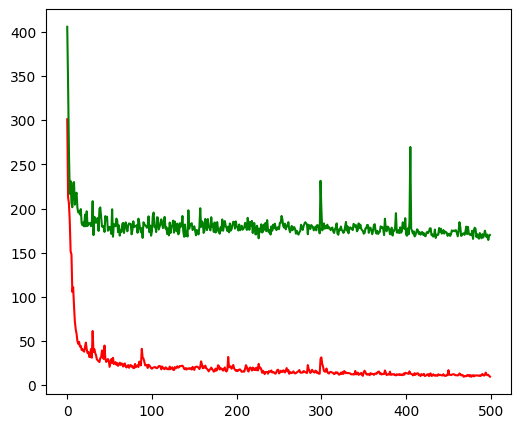

In [42]:
plt.figure(figsize=(6, 5))
# training loss
plt.plot(history.history['loss'], color='r')
#validation loss
plt.plot(history.history['val_loss'], color='g')
plt.show()

# Lets predict with test data

2/2 [==============================] - 1s 136ms/step


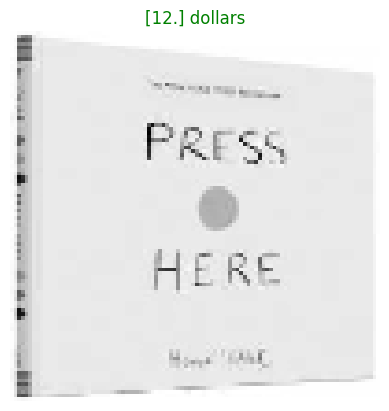

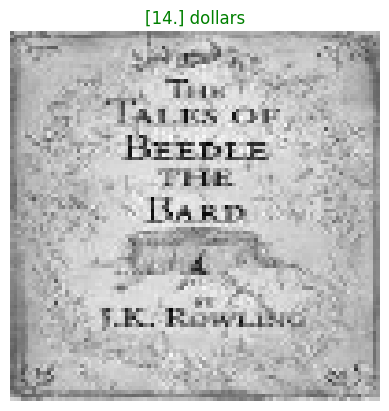

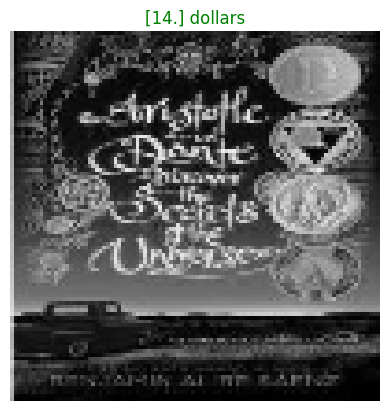

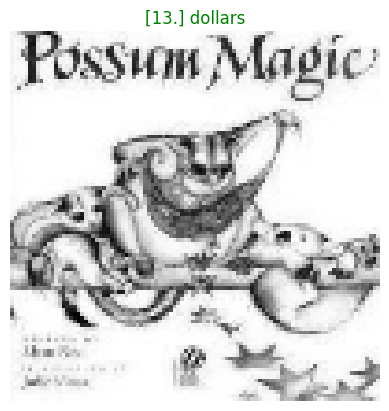

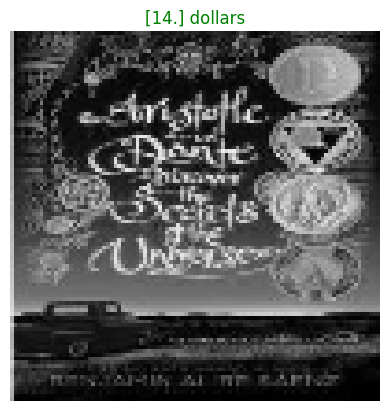

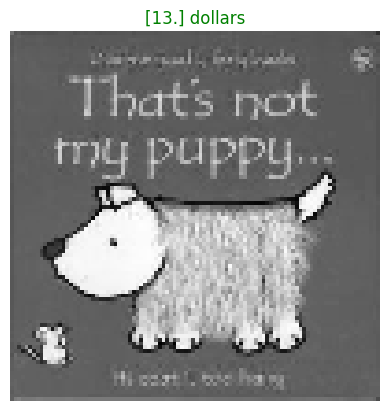

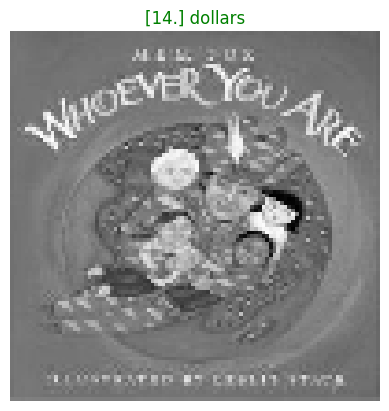

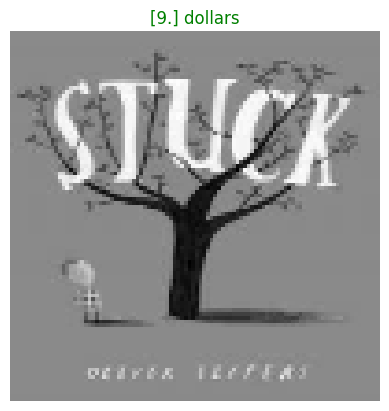

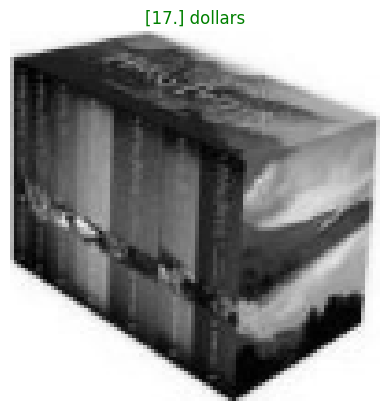

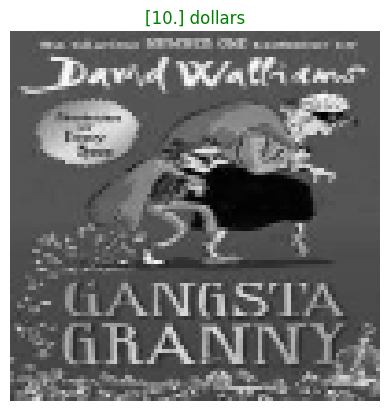

In [43]:
Y_pred = np.round(model.predict(X_test))
np.random.seed(23)
for rand_num in np.random.randint(0, len(Y_test), 10):
    plt.figure()
    plt.imshow(X_test[rand_num].reshape(100, 100),cmap='gray'), plt.axis('off')
    if np.where(Y_pred[rand_num] < 10)[0].sum() == np.where(Y_test[rand_num] <10)[0].sum():
        plt.title(str(Y_pred[rand_num]) +' dollars', color='g')
    else :
        plt.title(str(Y_pred[rand_num]) +' dollars', color='r')